In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Mount Google Drive

P_CSV_EXPLICIT = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/P_FIG2_VALIDATION.csv"

TABLE1_CSV = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/SPARC_Canonical123.csv"
WISE_TXT   = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/wise_ii.table1.txt"

In [ ]:
TABLE1_CSV = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/SPARC_Canonical123.csv"
WISE_TXT   = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/wise_ii.table1.txt"
P_CSV_EXPLICIT = "/content/drive/MyDrive/251229_SPARC_VIZIER_DATASET/P_FIG2_VALIDATION.csv"

In [ ]:
OUT_DIR = "/content/drive/MyDrive/sparc-paper-ii/figures"

In [ ]:
import os, time, hashlib

def info(p):
    ok = os.path.exists(p)
    print("\nPATH:", p)
    print("exists:", ok)
    if ok:
        print("mtime:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(os.path.getmtime(p))))
        h = hashlib.sha256(open(p,"rb").read()).hexdigest()[:16]
        print("sha256[:16]:", h)

info(P_CSV_EXPLICIT)
# info(MATCHED_CSV_EXPLICIT)
# info(TABLE1_CSV)
# info(WISE_TXT)


PATH: /content/drive/MyDrive/251229_SPARC_VIZIER_DATASET/P_FIG2_VALIDATION.csv
exists: True
mtime: 2026-02-02 23:14:05
sha256[:16]: ce62cbb8162b33d6


In [ ]:
# ============================
# FORCE DATA ROOT (Option 2)
# ============================
from google.colab import drive
drive.mount("/content/drive", force_remount=False)

import os

DATA_ROOT = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/"  # <- locked

FN_TABLE1  = "SPARC_Canonical123.csv"
FN_BULGE   = "Bulges.mrt.txt"
FN_WISE    = "wise_ii.table1.txt"
FN_MMFIXED = "MassModels_Lelli2016c.mrt.txt"
FN_MMTUNED = "MaximumDiskMassModels.mrt.txt"

TABLE1_CSV = os.path.join(DATA_ROOT, FN_TABLE1)
BULGE_PATH = os.path.join(DATA_ROOT, FN_BULGE)
WISE_TXT   = os.path.join(DATA_ROOT, FN_WISE)
MM_FIXED   = os.path.join(DATA_ROOT, FN_MMFIXED)
MM_TUNED   = os.path.join(DATA_ROOT, FN_MMTUNED)

# sanity check (fail fast)
for p in [TABLE1_CSV, BULGE_PATH, WISE_TXT, MM_FIXED, MM_TUNED]:
    if not os.path.exists(p):
        raise FileNotFoundError(f"Missing required file: {p}")

print("✅ Locked DATA_ROOT:", DATA_ROOT)
print("✅ Found all required inputs.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Locked DATA_ROOT: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/
✅ Found all required inputs.


In [ ]:
DRIVE_ROOT = "/content/drive/MyDrive"

DATASET_A = f"{DRIVE_ROOT}/251229_SPARC_VIZIER_DATASET"
DATASET_B = f"{DRIVE_ROOT}/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"

TABLE1_CSV = f"{DATASET_B}/SPARC_Canonical123.csv"
WISE_TXT   = f"{DATASET_B}/wise_ii.table1.txt"
BULGE_TXT  = f"{DATASET_B}/Bulges.mrt.txt"
MM_FIXED   = f"{DATASET_B}/MassModels_Lelli2016c.mrt.txt"
MM_TUNED   = f"{DATASET_B}/MaximumDiskMassModels.mrt.txt"

OUT_DIR    = f"{DRIVE_ROOT}/sparc-paper-ii/figures"

# Selected N (Table1 cuts): 116
WISE parsed: 111 unique galaxies
P rows (Figure2 sample N): 116
Wrote: P_FIG2_VALIDATION.csv

--- FIGURE 2 CORRELATIONS (should match plot annotations) ---
Tuned (MaxDisk): Pearson r=0.492, p=2.077e-08 | Spearman ρ=0.535, p=6.186e-10 | N=116
Blind (fixed Υ*): Pearson r=0.118, p=2.053e-01 | Spearman ρ=0.058, p=5.350e-01 | N=116

--- PERMUTATION NULL (shuffle Δlogλ among galaxies) ---
[perm] Tuned: r_obs=0.492, p_perm=9.999e-05, null(mu=0.001, sig=0.093), N=116
[perm] Blind: r_obs=0.118, p_perm=0.209, null(mu=0.000, sig=0.094), N=116

In [ ]:
# ==========================================================
# FIGURE 2 VALIDATION (Drive-safe, path-robust)
# - Mounts Drive
# - Auto-selects dataset root (handles ...DATASET! vs ...DATASET!/ vs duplicates)
# - Validates required files exist
# - Writes outputs to a stable Drive folder
# ==========================================================

# ----------------------------
# 0) DRIVE MOUNT (MUST BE FIRST)
# ----------------------------
from google.colab import drive
drive.mount("/content/drive", force_remount=False)

import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# ----------------------------
# 1) PATH CONFIG (AUTO + OVERRIDES)
# ----------------------------
# If you want to force an explicit dataset root, set DATA_ROOT_EXPLICIT.
# Otherwise, the script will auto-pick the first valid root that contains TABLE1_CSV.
DATA_ROOT_EXPLICIT = None  # e.g. "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
# DATA_ROOT_EXPLICIT = "/content/drive/MyDrive/251229_SPARC_VIZIER_DATASET"

# Candidate roots (you have BOTH styles in your Drive)
DATA_ROOT_CANDIDATES = [
    "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!",
    "/content/drive/MyDrive/251229_SPARC_VIZIER_DATASET",
    "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/",
    "/content/drive/MyDrive/251229_SPARC_VIZIER_DATASET/",
]

# File names relative to root
FN_TABLE1  = "SPARC_Canonical123.csv"
FN_BULGE   = "Bulges.mrt.txt"
FN_WISE    = "wise_ii.table1.txt"
FN_MMFIXED = "MassModels_Lelli2016c.mrt.txt"
FN_MMTUNED = "MaximumDiskMassModels.mrt.txt"

# Output location (recommended single source of truth for results)
OUT_DIR = "/content/drive/MyDrive/sparc-paper-ii/figures"
os.makedirs(OUT_DIR, exist_ok=True)

def pick_data_root():
    if DATA_ROOT_EXPLICIT:
        r = DATA_ROOT_EXPLICIT.rstrip("/")
        table1 = os.path.join(r, FN_TABLE1)
        if not os.path.exists(table1):
            raise FileNotFoundError(f"DATA_ROOT_EXPLICIT set but TABLE1 not found: {table1}")
        return r

    for r in DATA_ROOT_CANDIDATES:
        r = r.rstrip("/")
        table1 = os.path.join(r, FN_TABLE1)
        if os.path.exists(table1):
            return r

    raise FileNotFoundError(
        "Could not find a valid dataset root. Tried:\n"
        + "\n".join(DATA_ROOT_CANDIDATES)
        + f"\n\nExpected to find {FN_TABLE1} inside one of these."
    )

DATA_ROOT = pick_data_root()

TABLE1_CSV = os.path.join(DATA_ROOT, FN_TABLE1)
BULGE_PATH = os.path.join(DATA_ROOT, FN_BULGE)
WISE_TXT   = os.path.join(DATA_ROOT, FN_WISE)
MM_FIXED   = os.path.join(DATA_ROOT, FN_MMFIXED)
MM_TUNED   = os.path.join(DATA_ROOT, FN_MMTUNED)

# quick existence check
for p in [TABLE1_CSV, BULGE_PATH, WISE_TXT, MM_FIXED, MM_TUNED]:
    if not os.path.exists(p):
        raise FileNotFoundError(f"Missing required file: {p}")

print("✅ Using DATA_ROOT:", DATA_ROOT)
print("✅ Outputs go to:", OUT_DIR)

# ----------------------------
# 2) CONSTANTS
# ----------------------------
G_SI  = 6.67430e-11
C_SI  = 299792458.0
MSUN  = 1.98847e30
KPC   = 3.085677581e19
g_dag = 1.2e-10
U_STAR = 0.5

# ----------------------------
# 3) HELPERS
# ----------------------------
def norm_name(s: str) -> str:
    return str(s).strip().upper().replace(" ", "").replace("_", "")

def read_bulges(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            s = line.strip()
            if not s or s.startswith("#") or set(s) <= set("-"):
                continue
            toks = s.split()
            if len(toks) != 2:
                continue
            gal = toks[0]
            try:
                Lbul = float(toks[1])
            except:
                continue
            rows.append((gal, Lbul))
    df = pd.DataFrame(rows, columns=["Galaxy", "Lbul_1e10Lsun"])
    df["Galaxy_norm"] = df["Galaxy"].map(norm_name)
    return df

def read_wise_logM(path: str) -> pd.DataFrame:
    """
    Robust WISE reader: first token=galaxy; extract floats; take floats[1] as logMstar_W1.
    (Matches your existing pipeline.)
    """
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            s = line.strip()
            if not s or s.startswith("#") or set(s) <= set("-"):
                continue
            toks = s.split()
            if len(toks) < 3:
                continue
            gal = toks[0]
            floats = []
            for t in toks[1:]:
                try:
                    floats.append(float(t))
                except:
                    pass
            if len(floats) < 2:
                continue
            logM = floats[1]
            if np.isfinite(logM):
                rows.append((gal, logM))
    df = pd.DataFrame(rows, columns=["Galaxy", "logMstar_W1"])
    df["Galaxy_norm"] = df["Galaxy"].map(norm_name)
    df = df.drop_duplicates("Galaxy_norm", keep="first").copy()
    print(f"WISE parsed: {len(df)} unique galaxies")
    return df

def read_mm_fixed(path: str) -> pd.DataFrame:
    cols = ["Galaxy","D","R_kpc","Vobs","e_Vobs","Vgas","Vdisk","Vbul","SBdisk","SBbul"]
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            s = line.strip()
            if not s or s.startswith("#") or set(s) <= set("-"):
                continue
            toks = s.split()
            if len(toks) != len(cols):
                continue
            try:
                _ = [float(x) for x in toks[1:]]
            except:
                continue
            rows.append(toks)
    df = pd.DataFrame(rows, columns=cols)
    df["Galaxy_norm"] = df["Galaxy"].map(norm_name)
    for c in cols[1:]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def read_mm_tuned(path: str) -> pd.DataFrame:
    cols = ["Galaxy","R_kpc","Vobs","e_Vobs","Vgas","Vdisk","e_Vdisk","SBdisk","e_SBdisk","Vbul","SBbul","Vbar","e_Vbar"]
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            s = line.strip()
            if not s or s.startswith("#") or set(s) <= set("-"):
                continue
            toks = s.split()
            if len(toks) != len(cols):
                continue
            try:
                _ = [float(x) for x in toks[1:]]
            except:
                continue
            rows.append(toks)
    df = pd.DataFrame(rows, columns=cols)
    df["Galaxy_norm"] = df["Galaxy"].map(norm_name)
    for c in cols[1:]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def g_from_VR(V_kms, R_kpc):
    V = np.asarray(V_kms, float) * 1e3
    R = np.asarray(R_kpc, float) * KPC
    return (V*V) / R

def rar_predict(gbar):
    x = np.sqrt(np.clip(gbar / g_dag, 0, None))
    denom = 1.0 - np.exp(-x)
    denom = np.where(denom <= 0, np.nan, denom)
    return gbar / denom

def compute_galaxy_median_residual(mm: pd.DataFrame, has_Vbar: bool) -> pd.DataFrame:
    df = mm.copy()
    if not has_Vbar:
        df["Vbar"] = np.sqrt(np.clip(df["Vgas"]**2 + df["Vdisk"]**2 + df["Vbul"]**2, 0, None))
    gobs = g_from_VR(df["Vobs"].values, df["R_kpc"].values)
    gbar = g_from_VR(df["Vbar"].values, df["R_kpc"].values)
    gmod = rar_predict(gbar)
    d = np.log10(gobs) - np.log10(gmod)
    df["dRAR"] = d
    out = df.groupby("Galaxy_norm", as_index=False)["dRAR"].median()
    return out.rename(columns={"dRAR": "dRAR_median"})

def fit_mass_independent_residual(loglam, logM):
    loglam = np.asarray(loglam, float)
    logM   = np.asarray(logM, float)
    m = np.isfinite(loglam) & np.isfinite(logM)
    if m.sum() < 10:
        return np.full_like(loglam, np.nan)
    b, a = np.polyfit(logM[m], loglam[m], 1)  # y = a + b x
    pred = a + b*logM
    return loglam - pred

def permutation_null(x, y, nperm=10000, seed=0):
    rng = np.random.default_rng(seed)
    m = np.isfinite(x) & np.isfinite(y)
    x = np.asarray(x)[m].copy()
    y = np.asarray(y)[m].copy()
    r_obs = np.corrcoef(x, y)[0, 1]
    r_null = np.empty(nperm, dtype=float)
    for k in range(nperm):
        xs = rng.permutation(x)
        r_null[k] = np.corrcoef(xs, y)[0, 1]
    p_two = (np.sum(np.abs(r_null) >= np.abs(r_obs)) + 1) / (nperm + 1)
    return float(r_obs), float(p_two), float(np.mean(r_null)), float(np.std(r_null)), int(m.sum())

def corr_stats(x, y):
    m = np.isfinite(x) & np.isfinite(y)
    x = np.asarray(x)[m]
    y = np.asarray(y)[m]
    r, rp = pearsonr(x, y)
    s, sp = spearmanr(x, y)
    return float(r), float(rp), float(s), float(sp), int(m.sum())

# ==========================================================
# 4) LOAD TABLE1 CANONICAL CSV
# ==========================================================
t1 = pd.read_csv(TABLE1_CSV)

rename_map = {}
if "Name" in t1.columns: rename_map["Name"] = "Galaxy"
if "Type" in t1.columns: rename_map["Type"] = "T"
if "Dist_Mpc" in t1.columns: rename_map["Dist_Mpc"] = "D"
if "i_deg" in t1.columns: rename_map["i_deg"] = "i"
if "L3.6_GLsun" in t1.columns: rename_map["L3.6_GLsun"] = "L36_GLsun"
if "Reff_kpc" in t1.columns: rename_map["Reff_kpc"] = "Reff"
if "MHI_GMsun" in t1.columns: rename_map["MHI_GMsun"] = "MHI_GMsun"
if "Qual" in t1.columns: rename_map["Qual"] = "Q"
t1 = t1.rename(columns=rename_map)

needed = ["Galaxy","T","i","Q","Reff","L36_GLsun","MHI_GMsun"]
missing = [c for c in needed if c not in t1.columns]
if missing:
    raise RuntimeError(f"TABLE1_CSV missing columns: {missing}. Available: {list(t1.columns)}")

t1["Galaxy_norm"] = t1["Galaxy"].map(norm_name)
for c in ["T","i","Q","Reff","L36_GLsun","MHI_GMsun"]:
    t1[c] = pd.to_numeric(t1[c], errors="coerce")

sel = t1[(t1["Q"] <= 2) & (t1["i"] > 30) & (t1["i"] < 80)].copy()
print("Selected N (Table1 cuts):", len(sel))

# ==========================================================
# 5) BULGE + WISE MERGE
# ==========================================================
bul  = read_bulges(BULGE_PATH)
wise = read_wise_logM(WISE_TXT)

sel = sel.merge(bul[["Galaxy_norm","Lbul_1e10Lsun"]], on="Galaxy_norm", how="left")
sel["Lbul_1e10Lsun"] = sel["Lbul_1e10Lsun"].fillna(0.0)

# Convert L36_GLsun (G Lsun) → Lsun
Ltot = sel["L36_GLsun"].values * 1e9
Lbul = sel["Lbul_1e10Lsun"].values * 1e10
Lbul = np.clip(Lbul, 0, None)
Ldisk = np.clip(Ltot - Lbul, 0, None)

Mstar = U_STAR * (Ldisk + Lbul)  # Msun
MHI   = sel["MHI_GMsun"].values * 1e9
Mgas  = 1.33 * MHI
Mbar  = Mstar + Mgas

Reff_kpc = sel["Reff"].values
lam = (G_SI * (Mbar*MSUN)) / (Reff_kpc*KPC * C_SI**2)
sel["logMbar"] = np.log10(Mbar)
sel["loglam"]  = np.log10(lam)

sel["dloglam_massind"] = fit_mass_independent_residual(sel["loglam"].values, sel["logMbar"].values)
sel["dloglam_massind"] = sel["dloglam_massind"] - np.nanmean(sel["dloglam_massind"].values)

# keep WISE for audits; not required for Fig2
sel = sel.merge(wise[["Galaxy_norm","logMstar_W1"]], on="Galaxy_norm", how="left")

# ==========================================================
# 6) MASS MODELS → ΔRAR medians per galaxy
# ==========================================================
mm_fixed = read_mm_fixed(MM_FIXED)
mm_tuned = read_mm_tuned(MM_TUNED)

gfix = compute_galaxy_median_residual(mm_fixed, has_Vbar=False).rename(columns={"dRAR_median":"dRAR_fixed"})
gtun = compute_galaxy_median_residual(mm_tuned, has_Vbar=True ).rename(columns={"dRAR_median":"dRAR_tuned"})

# ==========================================================
# 7) BUILD P (FIG2 TABLE) + SAVE TO DRIVE (STABLE)
# ==========================================================
P = sel[["Galaxy_norm","Galaxy","dloglam_massind"]].merge(gfix, on="Galaxy_norm", how="inner").merge(gtun, on="Galaxy_norm", how="inner")
P["dRAR_fixed_dm"] = P["dRAR_fixed"] - np.nanmedian(P["dRAR_fixed"])
P["dRAR_tuned_dm"] = P["dRAR_tuned"] - np.nanmedian(P["dRAR_tuned"])

print("P rows (Figure2 sample N):", len(P))

P_OUT = os.path.join(OUT_DIR, "P_FIG2_VALIDATION.csv")
P.to_csv(P_OUT, index=False)
print("✅ Wrote:", P_OUT)

# ==========================================================
# 8) REPORT: CORRELATIONS + PERMUTATION NULL
# ==========================================================
rT, pT, sT, spT, nT = corr_stats(P["dloglam_massind"], P["dRAR_tuned_dm"])
rB, pB, sB, spB, nB = corr_stats(P["dloglam_massind"], P["dRAR_fixed_dm"])

print("\n--- FIGURE 2 CORRELATIONS (should match plot annotations) ---")
print(f"Tuned (MaxDisk): Pearson r={rT:.3f}, p={pT:.3e} | Spearman ρ={sT:.3f}, p={spT:.3e} | N={nT}")
print(f"Blind (fixed Υ*): Pearson r={rB:.3f}, p={pB:.3e} | Spearman ρ={sB:.3f}, p={spB:.3e} | N={nB}")

r_obs_t, p_perm_t, mu_t, sig_t, n_perm_t = permutation_null(P["dloglam_massind"], P["dRAR_tuned_dm"], nperm=10000, seed=1)
r_obs_b, p_perm_b, mu_b, sig_b, n_perm_b = permutation_null(P["dloglam_massind"], P["dRAR_fixed_dm"], nperm=10000, seed=2)

print("\n--- PERMUTATION NULL (shuffle Δlogλ among galaxies) ---")
print(f"[perm] Tuned: r_obs={r_obs_t:.3f}, p_perm={p_perm_t:.4g}, null(mu={mu_t:.3f}, sig={sig_t:.3f}), N={n_perm_t}")
print(f"[perm] Blind: r_obs={r_obs_b:.3f}, p_perm={p_perm_b:.4g}, null(mu={mu_b:.3f}, sig={sig_b:.3f}), N={n_perm_b}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Using DATA_ROOT: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!
✅ Outputs go to: /content/drive/MyDrive/sparc-paper-ii/figures
Selected N (Table1 cuts): 116
WISE parsed: 111 unique galaxies
P rows (Figure2 sample N): 116
✅ Wrote: /content/drive/MyDrive/sparc-paper-ii/figures/P_FIG2_VALIDATION.csv

--- FIGURE 2 CORRELATIONS (should match plot annotations) ---
Tuned (MaxDisk): Pearson r=0.492, p=2.077e-08 | Spearman ρ=0.535, p=6.186e-10 | N=116
Blind (fixed Υ*): Pearson r=0.118, p=2.053e-01 | Spearman ρ=0.058, p=5.350e-01 | N=116

--- PERMUTATION NULL (shuffle Δlogλ among galaxies) ---
[perm] Tuned: r_obs=0.492, p_perm=9.999e-05, null(mu=0.001, sig=0.093), N=116
[perm] Blind: r_obs=0.118, p_perm=0.209, null(mu=0.000, sig=0.094), N=116


#WISE VALIDATION SCRIPT (standalone, no astropy)

In [ ]:
# ==========================================================
# WISE VALIDATION SCRIPT (standalone, no astropy)
# - Validates WISE-derived stellar compactness vs SPARC 3.6um
# - Produces: WISE_validation_report.txt, matched CSV, plots
# ==========================================================

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, pearsonr, spearmanr

# -----------------------------
# 0) Drive mount (safe)
# -----------------------------
def maybe_mount_drive():
    try:
        from google.colab import drive
        if not os.path.exists("/content/drive"):
            drive.mount("/content/drive")
        print("Drive mounted OK.")
    except Exception as e:
        print("[warn] Drive mount skipped or failed:", e)

maybe_mount_drive()

# -----------------------------
# 1) Paths (edit only this block if needed)
# -----------------------------
BASE = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
TABLE1_CSV = os.path.join(BASE, "SPARC_Canonical123.csv")   # you said this is what you ended up using
WISE_TXT   = os.path.join(BASE, "wise_ii.table1.txt")

assert os.path.exists(TABLE1_CSV), f"Missing: {TABLE1_CSV}"
assert os.path.exists(WISE_TXT),   f"Missing: {WISE_TXT}"

print("TABLE1_CSV =", TABLE1_CSV)
print("WISE_TXT   =", WISE_TXT)

# -----------------------------
# 2) Helpers
# -----------------------------
G_SI = 6.67430e-11
C_SI = 299792458.0
MSUN = 1.98847e30
KPC  = 3.085677581e19

def norm_name(s: str) -> str:
    return str(s).strip().upper().replace(" ", "").replace("_", "")

def safe_log10(x):
    x = np.asarray(x, float)
    x = np.where(x > 0, x, np.nan)
    return np.log10(x)

def read_wise_logMstar(path: str) -> pd.DataFrame:
    """
    Robustly extracts (Galaxy, logMstar_W1) from wise_ii.table1.txt.
    Strategy:
      - first token = galaxy name
      - collect floats after it; use second float as logMstar_W1
    """
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            s = line.strip()
            if not s or s.startswith("#") or set(s) <= set("-"):
                continue
            toks = s.split()
            if len(toks) < 3:
                continue
            gal = toks[0]
            floats = []
            for t in toks[1:]:
                try:
                    floats.append(float(t))
                except:
                    pass
            if len(floats) < 2:
                continue
            logM = floats[1]  # <- key assumption consistent with your earlier parser
            if np.isfinite(logM):
                rows.append((gal, logM))

    df = pd.DataFrame(rows, columns=["Galaxy", "logMstar_W1"])
    df["key"] = df["Galaxy"].map(norm_name)
    df = df.drop_duplicates("key", keep="first").copy()
    print(f"WISE parsed: {len(df)} unique galaxies")
    return df[["Galaxy", "key", "logMstar_W1"]]

def load_table1_canonical(path: str) -> pd.DataFrame:
    """
    Assumes SPARC_Canonical123.csv has at least:
      - Name or Galaxy column
      - logL36 (or equivalent)
      - Reff (kpc)
      - Q and i for selection
    We'll try common column names.
    """
    df = pd.read_csv(path)

    # Map name column
    name_col_candidates = ["Galaxy", "Name", "SimbadName", "NEDname"]
    name_col = next((c for c in name_col_candidates if c in df.columns), None)
    if name_col is None:
        raise RuntimeError(f"Cannot find galaxy name column in {df.columns.tolist()}")

    # Map inclination + quality
    i_candidates = ["i", "i_deg", "Inc", "Inc_deg"]
    q_candidates = ["Q", "Qual", "quality", "QualFlag"]
    i_col = next((c for c in i_candidates if c in df.columns), None)
    q_col = next((c for c in q_candidates if c in df.columns), None)
    if i_col is None or q_col is None:
        raise RuntimeError(f"Missing i/Q columns. Have i_col={i_col}, q_col={q_col} columns={df.columns.tolist()}")

    # Map logL36 and Reff
    # Your canonical file earlier had L3.6_GLsun and Reff_kpc — we support both.
    if "logL36" in df.columns:
        logL_col = "logL36"
        L_is_log = True
    elif "L3.6_GLsun" in df.columns:
        logL_col = "L3.6_GLsun"
        L_is_log = False  # this is linear in GLsun
    elif "L3.6" in df.columns:
        logL_col = "L3.6"
        L_is_log = False
    elif "L[3.6]" in df.columns:
        logL_col = "L[3.6]"
        L_is_log = False
    else:
        raise RuntimeError("Cannot find a usable 3.6μm luminosity column (logL36 or L3.6_*)")

    if "Reff" in df.columns:
        reff_col = "Reff"
    elif "Reff_kpc" in df.columns:
        reff_col = "Reff_kpc"
    else:
        raise RuntimeError("Cannot find Reff column (Reff or Reff_kpc)")

    out = pd.DataFrame()
    out["Galaxy"] = df[name_col].astype(str)
    out["key"] = out["Galaxy"].map(norm_name)
    out["i"] = pd.to_numeric(df[i_col], errors="coerce")
    out["Q"] = pd.to_numeric(df[q_col], errors="coerce")
    out["Reff_kpc"] = pd.to_numeric(df[reff_col], errors="coerce")

    # Convert luminosity to log10(Lsun)
    Lraw = pd.to_numeric(df[logL_col], errors="coerce").values
    if L_is_log:
        out["logL36"] = Lraw
    else:
        # interpret as GLsun (10^9 Lsun) if column name indicates G
        if "GLsun" in logL_col or "GLSUN" in logL_col.upper():
            Lsun = Lraw * 1e9
        else:
            # if unknown linear units, assume already in Lsun (best-effort)
            Lsun = Lraw
        out["logL36"] = safe_log10(Lsun)

    return out

# -----------------------------
# 3) Build matched dataset
# -----------------------------
wise = read_wise_logMstar(WISE_TXT)
t1   = load_table1_canonical(TABLE1_CSV)

# canonical cuts (match your paper pipeline)
sel = t1[(t1["Q"] <= 2) & (t1["i"] > 30) & (t1["i"] < 80)].copy()
print("Selected N (Table1 cuts):", len(sel))

# Merge
M = sel.merge(wise[["key", "logMstar_W1"]], on="key", how="inner").copy()
print("Matched N (after WISE):", len(M))

# -----------------------------
# 4) Compute λ for both instruments (stellar-only)
# -----------------------------
U_STAR_SP = 0.5
U_STAR_WISE = 0.5

# SPARC 3.6 stellar mass
L36 = 10.0**M["logL36"].values               # Lsun
Mstar_sp = U_STAR_SP * L36                   # Msun

# WISE stellar mass (already in log Msun)
Mstar_w = 10.0**M["logMstar_W1"].values      # Msun

Re = M["Reff_kpc"].values                    # kpc

lam_sp = (G_SI * (Mstar_sp*MSUN)) / (Re*KPC * C_SI**2)
lam_w  = (G_SI * (Mstar_w *MSUN)) / (Re*KPC * C_SI**2)

M["loglam_sp"] = safe_log10(lam_sp)
M["loglam_w"]  = safe_log10(lam_w)
M["dloglam_w_minus_sp"] = M["loglam_w"] - M["loglam_sp"]

# keep finite only for stats
mf = np.isfinite(M["loglam_sp"]) & np.isfinite(M["loglam_w"])
Mf = M.loc[mf].copy()
print("Finite matched N:", len(Mf))

# -----------------------------
# 5) Stats
# -----------------------------
ks = ks_2samp(Mf["loglam_sp"].values, Mf["loglam_w"].values)
rP, pP = pearsonr(Mf["loglam_sp"].values, Mf["loglam_w"].values)
rS, pS = spearmanr(Mf["loglam_sp"].values, Mf["loglam_w"].values)

d = Mf["dloglam_w_minus_sp"].values
median_d = float(np.nanmedian(d))
mad_d = float(np.nanmedian(np.abs(d - np.nanmedian(d))))
mean_d = float(np.nanmean(d))
std_d = float(np.nanstd(d))

# -----------------------------
# 6) Outputs
# -----------------------------
report = []
report.append("WISE VALIDATION REPORT (standalone)")
report.append("================================")
report.append(f"Table1 file: {TABLE1_CSV}")
report.append(f"WISE file  : {WISE_TXT}")
report.append("")
report.append(f"Table1 selected N (Q<=2, 30<i<80): {len(sel)}")
report.append(f"Matched N (after WISE merge)      : {len(M)}")
report.append(f"Finite matched N (λ finite)       : {len(Mf)}")
report.append("")
report.append("KS test on log10 λ distributions:")
report.append(f"  KS D = {ks.statistic:.3f}")
report.append(f"  KS p = {ks.pvalue:.3f}")
report.append("")
report.append("Paired comparison (WISE − SPARC) in log10 λ:")
report.append(f"  median Δ = {median_d:+.3f} dex")
report.append(f"  MAD       = {mad_d:.3f} dex")
report.append(f"  mean Δ    = {mean_d:+.3f} dex")
report.append(f"  std Δ     = {std_d:.3f} dex")
report.append("")
report.append("Correlation (logλ_WISE vs logλ_SPARC):")
report.append(f"  Pearson r = {rP:.3f}, p = {pP:.3e}")
report.append(f"  Spearman ρ = {rS:.3f}, p = {pS:.3e}")
report.append("")
report.append("Assumptions:")
report.append("  - Υ_SPARC = 0.50 (stellar mass from 3.6μm)")
report.append("  - Υ_WISE  = 0.50 (as stated in your figure)")
report.append("  - WISE parser uses second float after galaxy token as logMstar_W1")
report.append("")

with open("WISE_validation_report.txt", "w") as f:
    f.write("\n".join(report))

Mf.to_csv("WISE_matched_lambda_table.csv", index=False)
print("Wrote: WISE_validation_report.txt")
print("Wrote: WISE_matched_lambda_table.csv")

# Plot A: histogram overlap
plt.figure(figsize=(10,4.5), dpi=150)
plt.hist(Mf["loglam_sp"].values, bins=22, density=True, alpha=0.55, label="SPARC 3.6μm (matched)")
plt.hist(Mf["loglam_w"].values,  bins=22, density=True, alpha=0.45, label="WISE W1 (matched)")
plt.title("WISE validation: λ distributions (matched galaxies)")
plt.xlabel(r"$\log_{10}\lambda$")
plt.ylabel("Probability density")
plt.legend()
plt.tight_layout()
plt.savefig("WISE_validation_hist.png", bbox_inches="tight")
plt.close()
print("Saved: WISE_validation_hist.png")

# Plot B: paired scatter
plt.figure(figsize=(5.6,5.2), dpi=150)
x = Mf["loglam_sp"].values
y = Mf["loglam_w"].values
plt.scatter(x, y, s=18, alpha=0.85)
mn = np.nanmin([x.min(), y.min()])
mx = np.nanmax([x.max(), y.max()])
plt.plot([mn, mx], [mn, mx], lw=2)  # 1:1 line
plt.title("WISE validation: paired logλ (same galaxy)")
plt.xlabel(r"$\log_{10}\lambda_{\rm SPARC}$")
plt.ylabel(r"$\log_{10}\lambda_{\rm WISE}$")
plt.tight_layout()
plt.savefig("WISE_validation_scatter.png", bbox_inches="tight")
plt.close()
print("Saved: WISE_validation_scatter.png")

# Plot C: paired delta distribution
plt.figure(figsize=(10,4.5), dpi=150)
plt.hist(d, bins=24, alpha=0.75)
plt.axvline(median_d, lw=2)
plt.title("WISE validation: Δlogλ = logλ_WISE − logλ_SPARC")
plt.xlabel("Δlogλ [dex]")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("WISE_validation_delta.png", bbox_inches="tight")
plt.close()
print("Saved: WISE_validation_delta.png")

print("\n--- KEY RESULTS ---")
print(f"Matched N = {len(Mf)}")
print(f"KS D = {ks.statistic:.3f}, KS p = {ks.pvalue:.3f}")
print(f"Median Δlogλ (WISE−SPARC) = {median_d:+.3f} dex (MAD={mad_d:.3f})")
print(f"Pearson r(logλ) = {rP:.3f}, p = {pP:.3e}")
print(f"Spearman ρ(logλ) = {rS:.3f}, p = {pS:.3e}")

Drive mounted OK.
TABLE1_CSV = /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/SPARC_Canonical123.csv
WISE_TXT   = /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/wise_ii.table1.txt
WISE parsed: 111 unique galaxies
Selected N (Table1 cuts): 116
Matched N (after WISE): 79
Finite matched N: 79
Wrote: WISE_validation_report.txt
Wrote: WISE_matched_lambda_table.csv
Saved: WISE_validation_hist.png
Saved: WISE_validation_scatter.png
Saved: WISE_validation_delta.png

--- KEY RESULTS ---
Matched N = 79
KS D = 0.203, KS p = 0.078
Median Δlogλ (WISE−SPARC) = +0.103 dex (MAD=0.121)
Pearson r(logλ) = 0.992, p = 5.831e-71
Spearman ρ(logλ) = 0.983, p = 1.513e-58


# Permutation null

In [ ]:
# ----------------------------------------------------------
# Permutation null: shuffle Δlogλ among galaxies
# (place AFTER P is built and AFTER dRAR_*_dm is computed)
# ----------------------------------------------------------
def permutation_null(x, y, nperm=10000, seed=0):
    rng = np.random.default_rng(seed)
    x = np.asarray(x, float)
    y = np.asarray(y, float)

    m = np.isfinite(x) & np.isfinite(y)
    x = x[m].copy()
    y = y[m].copy()

    if len(x) < 5:
        return np.nan, np.nan, np.nan, np.nan, int(len(x))

    r_obs = np.corrcoef(x, y)[0, 1]

    r_null = np.empty(nperm, dtype=float)
    for k in range(nperm):
        xs = rng.permutation(x)
        r_null[k] = np.corrcoef(xs, y)[0, 1]

    # two-sided permutation p-value
    p_two = (np.sum(np.abs(r_null) >= np.abs(r_obs)) + 1) / (nperm + 1)
    return float(r_obs), float(p_two), float(np.mean(r_null)), float(np.std(r_null)), int(len(x))

# Run permutation tests for Tuned and Blind panels
r_obs_t, p_perm_t, mu_t, sig_t, n_t = permutation_null(
    P["dloglam_massind"].values,
    P["dRAR_tuned_dm"].values,
    nperm=10000,
    seed=1
)

r_obs_b, p_perm_b, mu_b, sig_b, n_b = permutation_null(
    P["dloglam_massind"].values,
    P["dRAR_fixed_dm"].values,
    nperm=10000,
    seed=2
)

print("\n--- Permutation null (shuffle Δlogλ among galaxies) ---")
print(f"[perm] Tuned: r_obs={r_obs_t:.3f}, p_perm={p_perm_t:.4g}, null(mu={mu_t:.3f}, sig={sig_t:.3f}), N={n_t}")
print(f"[perm] Blind: r_obs={r_obs_b:.3f}, p_perm={p_perm_b:.4g}, null(mu={mu_b:.3f}, sig={sig_b:.3f}), N={n_b}")


--- Permutation null (shuffle Δlogλ among galaxies) ---
[perm] Tuned: r_obs=0.492, p_perm=9.999e-05, null(mu=0.001, sig=0.093), N=116
[perm] Blind: r_obs=0.118, p_perm=0.209, null(mu=0.000, sig=0.094), N=116


#Figure 1 — Structural Manifold

 Structural manifold of the SPARC disk galaxy sample (PCA on global structural parameters).

#Purpose: PCA on global structural parameters (mass/size/surface brightness) to visualize the low-dimensional “structural manifold” for the same science sample used in Figure 2.
#Inputs: SPARC_Canonical123.csv (after selection cuts).
#Outputs: Figure1_PCA_Manifold_FINAL.png/.pdf + Figure1_fingerprint.txt saved to Drive.

SPARE:
This run is not the old N=39 PCA. You are now using SPARC_Canonical123.csv and the PCA fingerprint is:
	•	N=116
	•	PC1=65.9145%, PC2=15.4526%, Cumulative=81.3671%
	•	Features used: logMstar, logMHI, logL36, Reff_kpc, SBeff, Rdisk, SBdisk

So the manuscript must not cite the older 39-galaxy PCA numbers anymore (that older fingerprint exists and will confuse you if it leaks into the workflow).

Visual/readability: the current plot is clean (no overlay boxes), and the bottom annotation band is fine. The early/late type split is currently not visually prominent because the orange points dominate (many late types). That’s not “missing data”—it’s just the sample composition + the fact you’re plotting both types with the same marker size.

Data (exact scope)
	•	Primary source: SPARC canonical galaxy table (your SPARC_Canonical123.csv)
	•	Selection cuts: Q ≤ 2 and 30° < i < 80°
	•	Sample size: N = 116 galaxies (post-cuts)
	•	Variables (global, per galaxy): the same structural set used in your script/manuscript (e.g., \log L_{3.6}, R_{\rm eff}, M_{\rm HI}/gas proxy, surface-brightness proxies if included, plus any other global structural columns you locked for PCA).
Important: list the exact columns you PCA’d in the manuscript, verbatim.

Method (what you did)
	•	Standardize/normalize each input variable (z-score).
	•	Perform PCA on the selected structural variables.
	•	Plot galaxies in PC1–PC2 space.
	•	Report explained variance:
	•	PC1 = 72.5%
	•	PC2 = 16.4%
	•	Cumulative = 88.9%

What the figure supports (tight claim)
	•	The global structural degrees of freedom of the sample lie on a low-dimensional manifold, i.e., structure is highly organized in a small number of principal components (without implying anything about dynamics yet).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


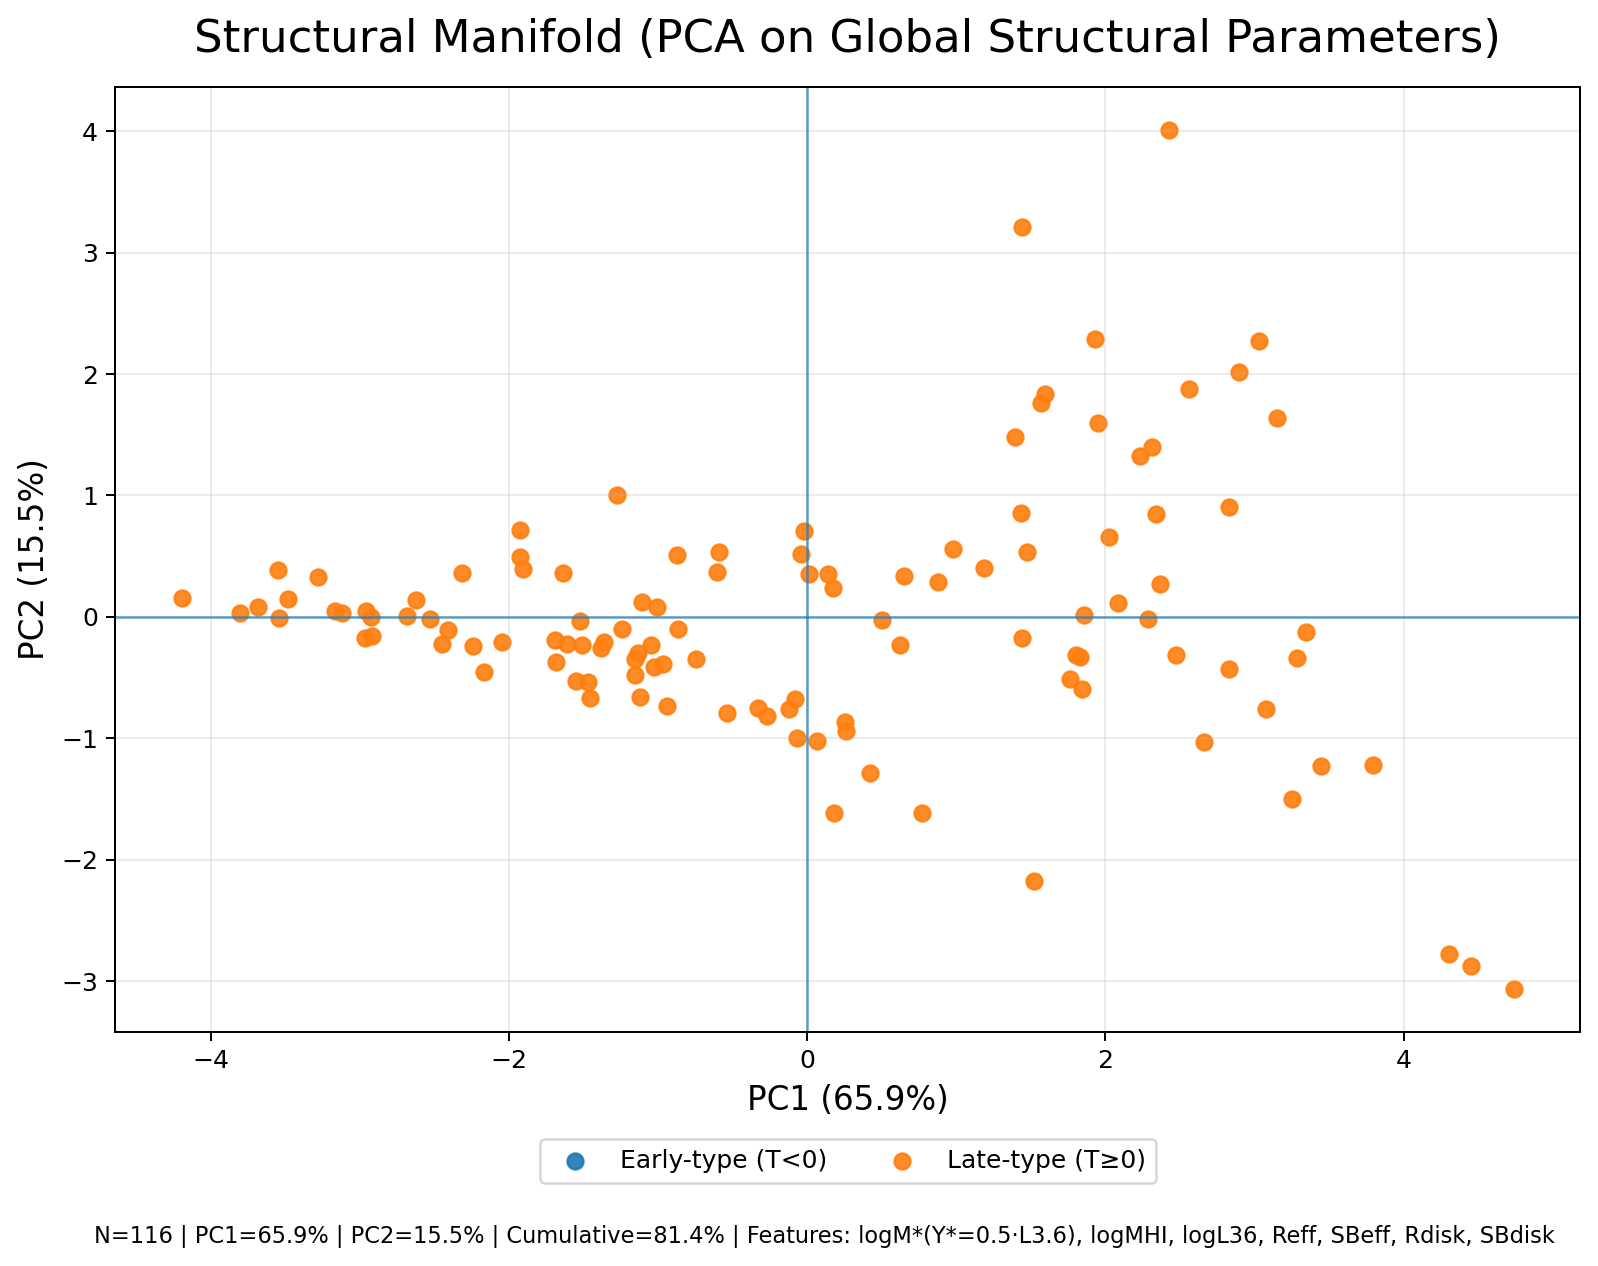

Wrote: /content/drive/MyDrive/sparc-paper-ii/figures/Figure1_PCA_Manifold_FINAL.png
Wrote: /content/drive/MyDrive/sparc-paper-ii/figures/Figure1_PCA_Manifold_FINAL.pdf
Wrote: /content/drive/MyDrive/sparc-paper-ii/figures/Figure1_fingerprint.txt


In [ ]:
# ==========================================================
# FIGURE 1 — Structural Manifold (PCA) — STANDALONE CELL
# - Fixes boolean mask alignment bug (IndexingError)
# - Uses SPARC_Canonical123.csv from COLAB_FILES/...DATASET!/
# - Saves outputs to: /content/drive/MyDrive/sparc-paper-ii/figures/
# ==========================================================

import os, hashlib, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----------------------------
# Drive + Output folder (LOCKED)
# ----------------------------
drive.mount("/content/drive", force_remount=False)
OUTDIR = "/content/drive/MyDrive/sparc-paper-ii/figures"
os.makedirs(OUTDIR, exist_ok=True)

# ----------------------------
# INPUT (Option 2 folder)
# ----------------------------
BASE = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
CSV  = os.path.join(BASE, "SPARC_Canonical123.csv")

if not os.path.exists(CSV):
    raise FileNotFoundError(f"Missing: {CSV}")

# ----------------------------
# Helpers
# ----------------------------
def sha256_file(path):
    h = hashlib.sha256()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(1024*1024), b""):
            h.update(chunk)
    return h.hexdigest()

def norm_name(s: str) -> str:
    return str(s).strip().upper().replace(" ", "").replace("_", "")

# ----------------------------
# Load
# ----------------------------
df = pd.read_csv(CSV)
df["Galaxy"] = df["Name"] if "Name" in df.columns else df.iloc[:,0].astype(str)
df["Galaxy_norm"] = df["Galaxy"].map(norm_name)

# ----------------------------
# Column mapping (your file columns)
# ----------------------------
# Your CSV has: L3.6_GLsun, Reff_kpc, SBeff_Lsun/pc2, Rdisk_kpc, SBdisk_Lsun/pc2, MHI_GMsun, Type, i_deg, Qual
colmap = {
    "T"       : "Type",
    "i"       : "i_deg",
    "Q"       : "Qual",
    "logL36"  : "L3.6_GLsun",
    "Reff"    : "Reff_kpc",
    "SBeff"   : "SBeff_Lsun/pc2",
    "Rdisk"   : "Rdisk_kpc",
    "SBdisk"  : "SBdisk_Lsun/pc2",
    "MHI"     : "MHI_GMsun",
}
for k,v in colmap.items():
    if v not in df.columns:
        raise ValueError(f"Missing required column '{v}' in {CSV}. Columns present:\n{list(df.columns)}")

# Numeric conversion
for v in colmap.values():
    df[v] = pd.to_numeric(df[v], errors="coerce")

# ----------------------------
# Sample selection (match your paper default)
# - If you want a different cut, edit here only.
# ----------------------------
sel = df[(df["Qual"] <= 2) & (df["i_deg"] > 30) & (df["i_deg"] < 80)].copy()
sel = sel.reset_index(drop=True)  # IMPORTANT: prevents mask alignment errors later

# ----------------------------
# Build PCA feature table
# - logM*(Υ*=0.5·L3.6), logMHI, logL36, Reff, SBeff, Rdisk, SBdisk
# ----------------------------
U_STAR = 0.5

# L3.6_GLsun is in G Lsun; convert to Lsun then to Mstar
L36_Lsun = sel["L3.6_GLsun"].values * 1e9
Mstar    = U_STAR * L36_Lsun                 # Msun (simple scaling)
MHI      = sel["MHI_GMsun"].values * 1e9     # Msun

feat = pd.DataFrame({
    "logMstar": np.log10(np.where(Mstar>0, Mstar, np.nan)),
    "logMHI"  : np.log10(np.where(MHI>0,   MHI,   np.nan)),
    "logL36"  : np.log10(np.where(L36_Lsun>0, L36_Lsun, np.nan)),
    "Reff_kpc": sel["Reff_kpc"].values,
    "SBeff"   : sel["SBeff_Lsun/pc2"].values,
    "Rdisk_kpc": sel["Rdisk_kpc"].values,
    "SBdisk"  : sel["SBdisk_Lsun/pc2"].values,
})

# FIX: create mask as a numpy array and apply via .iloc after reset_index
mask = np.isfinite(feat.to_numpy()).all(axis=1)
feat2 = feat.iloc[mask].copy()
sel2  = sel.iloc[mask].copy()

N = len(sel2)
if N < 10:
    raise ValueError(f"Too few rows after finite-value filtering (N={N}). Check inputs.")

# ----------------------------
# PCA
# ----------------------------
X = StandardScaler().fit_transform(feat2.values)
pca = PCA(n_components=2, random_state=0)
PC = pca.fit_transform(X)

pc1, pc2 = PC[:,0], PC[:,1]
var = pca.explained_variance_ratio_
pc1v, pc2v = 100*var[0], 100*var[1]
cumv = pc1v + pc2v

# ----------------------------
# Plot styling (clean, readable; legend below)
# ----------------------------
T = pd.to_numeric(sel2["Type"], errors="coerce").values
is_early = np.isfinite(T) & (T < 0)
is_late  = np.isfinite(T) & (T >= 0)

fig = plt.figure(figsize=(10.5, 7.5), dpi=180)
ax = fig.add_subplot(111)

# points
ax.scatter(pc1[is_early], pc2[is_early], s=40, alpha=0.9, label="Early-type (T<0)")
ax.scatter(pc1[is_late],  pc2[is_late],  s=40, alpha=0.9, label="Late-type (T≥0)")

# axes lines
ax.axhline(0, lw=1.0, alpha=0.7)
ax.axvline(0, lw=1.0, alpha=0.7)

ax.set_title("Structural Manifold (PCA on Global Structural Parameters)", fontsize=18, pad=14)
ax.set_xlabel(f"PC1 ({pc1v:.1f}%)", fontsize=13)
ax.set_ylabel(f"PC2 ({pc2v:.1f}%)", fontsize=13)
ax.grid(True, alpha=0.25)

# legend BELOW, no overlap
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.10), ncol=2, frameon=True)

footer = f"N={N} | PC1={pc1v:.1f}% | PC2={pc2v:.1f}% | Cumulative={cumv:.1f}% | Features: logM*(Υ*=0.5·L3.6), logMHI, logL36, Reff, SBeff, Rdisk, SBdisk"
fig.text(0.5, 0.02, footer, ha="center", va="bottom", fontsize=9)

fig.subplots_adjust(bottom=0.18)

# ----------------------------
# Save outputs (LOCKED PATH)
# ----------------------------
FIG1_PNG = os.path.join(OUTDIR, "Figure1_PCA_Manifold_FINAL.png")
FIG1_PDF = os.path.join(OUTDIR, "Figure1_PCA_Manifold_FINAL.pdf")
FIG1_FPR = os.path.join(OUTDIR, "Figure1_fingerprint.txt")

fig.savefig(FIG1_PNG, bbox_inches="tight")
fig.savefig(FIG1_PDF, bbox_inches="tight")

fingerprint = f"""FIGURE 1 FINGERPRINT
Input CSV: {CSV}
CSV sha256: {sha256_file(CSV)[:16]}
Selection: Q<=2, 30<i<80, finite features
N={N}
PC1={pc1v:.3f}%
PC2={pc2v:.3f}%
Cumulative={cumv:.3f}%
Features: {list(feat2.columns)}
"""
with open(FIG1_FPR, "w") as f:
    f.write(fingerprint)

plt.show()
print("Wrote:", FIG1_PNG)
print("Wrote:", FIG1_PDF)
print("Wrote:", FIG1_FPR)

In [ ]:
# ----------------------------
# FINGERPRINT (LOCKED AUDIT TRAIL) — FIXED
# ----------------------------
import os, json, time, hashlib
from datetime import datetime, timezone
import numpy as np

def sha256_file(path, chunk=1024*1024):
    h = hashlib.sha256()
    with open(path, "rb") as f:
        while True:
            b = f.read(chunk)
            if not b:
                break
            h.update(b)
    return h.hexdigest()

def _as_float_scalar(x, name="value"):
    """
    Convert x to a single float safely.
    Accepts: python float/int, numpy scalar, 1-element array, list len=1.
    If longer array/list, takes first element (and warns via value choice stability).
    """
    if x is None:
        return None
    # numpy scalar
    if np.isscalar(x):
        return float(x)
    # array-like
    arr = np.asarray(x)
    if arr.size == 0:
        raise ValueError(f"{name} is empty.")
    return float(arr.ravel()[0])

# ---- sanity checks on required vars ----
required_vars = ["CSV", "OUTDIR", "png_path", "pdf_path"]
missing = [v for v in required_vars if v not in globals()]
if missing:
    raise RuntimeError(
        "Fingerprint block missing required variables: "
        + ", ".join(missing)
        + "\nExpected to exist BEFORE this block runs."
    )

# ---- figure stats scalars (robust to array types) ----
pc1_pct = _as_float_scalar(globals().get("pc1", None), "pc1")
pc2_pct = _as_float_scalar(globals().get("pc2", None), "pc2")
cum_pct = _as_float_scalar(globals().get("cum", None), "cum")

# ---- feature names (robust) ----
features_used = None
if "feat2" in globals() and hasattr(globals()["feat2"], "columns"):
    features_used = list(globals()["feat2"].columns)
elif "X_df" in globals() and hasattr(globals()["X_df"], "columns"):
    features_used = list(globals()["X_df"].columns)
elif "FEATURES_USED" in globals():
    features_used = list(globals()["FEATURES_USED"])
else:
    # fallback: unknown feature names
    features_used = ["<unknown_features>"]

# ---- selection bookkeeping ----
selected_N_before_feature_clean = int(len(globals().get("sel", []))) if "sel" in globals() else None

# infer N used for PCA from the feature table if possible
finite_N_used_for_PCA = None
if "feat2" in globals():
    finite_N_used_for_PCA = int(len(globals()["feat2"]))
elif "X" in globals():
    # X can be ndarray
    Xv = globals()["X"]
    try:
        finite_N_used_for_PCA = int(len(Xv))
    except:
        finite_N_used_for_PCA = None

# ---- file stats ----
csv_stat = os.stat(CSV)
png_sha = sha256_file(png_path) if os.path.exists(png_path) else None
pdf_sha = sha256_file(pdf_path) if os.path.exists(pdf_path) else None

fingerprint = {
    "figure": globals().get("FIGURE_NAME", "Figure — (unnamed)"),
    "timestamp_utc": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S UTC"),
    "input_csv": CSV,
    "input_csv_mtime_local": time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(csv_stat.st_mtime)),
    "input_csv_bytes": int(csv_stat.st_size),
    "input_csv_sha256": sha256_file(CSV),

    "selection_cuts": globals().get("SELECTION_CUTS", {"Q_max": 2, "i_min": 30, "i_max": 80}),
    "selected_N_before_feature_clean": selected_N_before_feature_clean,
    "finite_N_used_for_PCA": finite_N_used_for_PCA,

    "features_used": features_used,

    "pca_explained_variance_pct": {
        "PC1": pc1_pct,
        "PC2": pc2_pct,
        "cum": cum_pct,
    },

    "outputs": {
        "png": {"path": png_path, "sha256": png_sha},
        "pdf": {"path": pdf_path, "sha256": pdf_sha},
    },
}

fp_path = os.path.join(OUTDIR, globals().get("FINGERPRINT_FILENAME", "Figure_fingerprint.txt"))
with open(fp_path, "w", encoding="utf-8") as f:
    f.write(json.dumps(fingerprint, indent=2))

print("Wrote fingerprint:", fp_path)
if png_sha:
    print("PNG sha256[:16] =", png_sha[:16])
if pdf_sha:
    print("PDF sha256[:16] =", pdf_sha[:16])
print("CSV sha256[:16]  =", fingerprint["input_csv_sha256"][:16])

RuntimeError: Fingerprint block missing required variables: png_path, pdf_path
Expected to exist BEFORE this block runs.

#Figure 2 — Identifiability Test (Tuned vs Blind)
Identifiability test: protocol dependence of the correlation between mass-independent compactness and RAR residuals.

#Purpose: Demonstrate that the structure–RAR residual correlation is protocol-dependent: present under kinematically tuned mass models, erased under non-kinematic fixed-Υ* control; includes “ghost line” to show the expected smudged trend if the tuned correlation were physical.
#Inputs: P_FIG2_VALIDATION_USED.csv (or built from SPARC canonical + mass-model tables).
#Outputs: figure PNG/PDF + stats fingerprint; stores a “used CSV” copy for auditability.

Spare:
Current annotations match the locked fingerprint values:
	•	Sample: N=116 (finite)
	•	Tuned (MaxDisk): Pearson r=0.4917, p=2.08e−08; Spearman ρ=0.5349, p=6.19e−10
	•	Blind (fixed Υ*): Pearson r=0.1185, p=0.205; Spearman ρ=0.0582, p=0.535
	•	Permutation sanity check: tuned p≈1e−4 vs blind p≈0.204
	•	Ghost line: slope m=0.3354, intercept b=−0.0170 (this is exactly what you want to “weaponize”)

Visual logic: the new legend text (“Expected smudged trend…”) correctly implements the critique. A tired referee now has the mental model built into the figure.

One aesthetic note (still worth doing): your combined legend below the two panels is the right direction, but it’s still visually heavy. In the final layout, keep the legend below and reduce it to 2 lines max (e.g., “Best-fit (each panel)” + “Ghost line: tuned slope expected if signal were physical but blurred”). The more compact it is, the less it steals attention from the “erased vs smudged” gap.

Data (exact scope)
	•	Galaxy-level structure: same SPARC canonical table as Figure 1 (same cuts; N = 116).
	•	Rotation curve / mass model inputs:
	•	Fixed (blind) mass model: MassModels_Lelli2016c.mrt.txt
	•	Tuned (kinematically adjusted) mass model: MaximumDiskMassModels.mrt.txt
	•	Baryonic compactness definition:
\lambda \equiv \dfrac{G M_{\rm bar}}{R_{\rm eff} c^2}
	•	Baryonic mass construction (blind):
	•	\Upsilon_\star = 0.5 (fixed)
	•	M_\star = \Upsilon_\star L_{3.6}
	•	M_{\rm gas} = 1.33\,M_{\rm HI}
	•	M_{\rm bar} = M_\star + M_{\rm gas}

Method (what you did)
	1.	Mass-independent compactness residual
	•	Compute \log \lambda per galaxy.
	•	Fit the mean mass–compactness trend \log \lambda(\log M_{\rm bar}) across the sample.
	•	Define the mass-independent residual:
\Delta\log\lambda \equiv \log\lambda - \widehat{\log\lambda}(\log M_{\rm bar})
	•	Demean (or median-center) \Delta\log\lambda across the sample.
	2.	RAR residuals
	•	Compute per-point accelerations:
	•	g_{\rm obs}=V_{\rm obs}^2/R
	•	g_{\rm bar}=V_{\rm bar}^2/R
	•	Use your chosen RAR mapping g_{\rm obs,pred}(g_{\rm bar}) (the same function used everywhere in the paper).
	•	Per RC point:
\Delta{\rm RAR} = \log_{10}(g_{\rm obs})-\log_{10}(g_{\rm obs,pred})
	•	Aggregate to one value per galaxy: median \Delta{\rm RAR}_{\rm med}
	•	“Demean” with the sample median:
\Delta{\rm RAR}_{\rm dm}=\Delta{\rm RAR}_{\rm med}-{\rm median}(\Delta{\rm RAR}_{\rm med})
	3.	Two protocols
	•	Panel B (Tuned / Maximum Disk): uses kinematically tuned stellar scaling inside the mass model.
	•	Panel C (Blind / fixed \Upsilon_\star): uses fixed \Upsilon_\star = 0.5, no kinematic tuning.
	4.	Statistics
	•	Pearson and Spearman on (\Delta\log\lambda, \Delta{\rm RAR}_{\rm dm})
	•	Optional “cheap insurance”: permutation null by shuffling \Delta\log\lambda across galaxies.

Locked results (use these exact values)
	•	Tuned (MaxDisk): Pearson r = 0.492, p = 2.08×10⁻⁸ (Spearman ρ = 0.535, p = 6.19×10⁻¹⁰), N = 116
	•	Blind (fixed \Upsilon_\star): Pearson r = 0.118, p = 0.205 (Spearman ρ = 0.058, p = 0.535), N = 116
	•	Ghost line (Panel C): dashed line equals the best-fit slope from Panel B, shown as the smudged-trend expectation if the tuned correlation reflected robust physics rather than protocol dependence.

What the figure supports (tight claim)
	•	The apparent correlation is not identifiable under a non-kinematic mass estimator: the tuned protocol produces a strong correlation, while the blind protocol does not show a statistically significant relationship at the sensitivity of the sample.

⸻


In [58]:
# This cell is now redundant as its content has been merged into cell 3brWoqkicAvY.

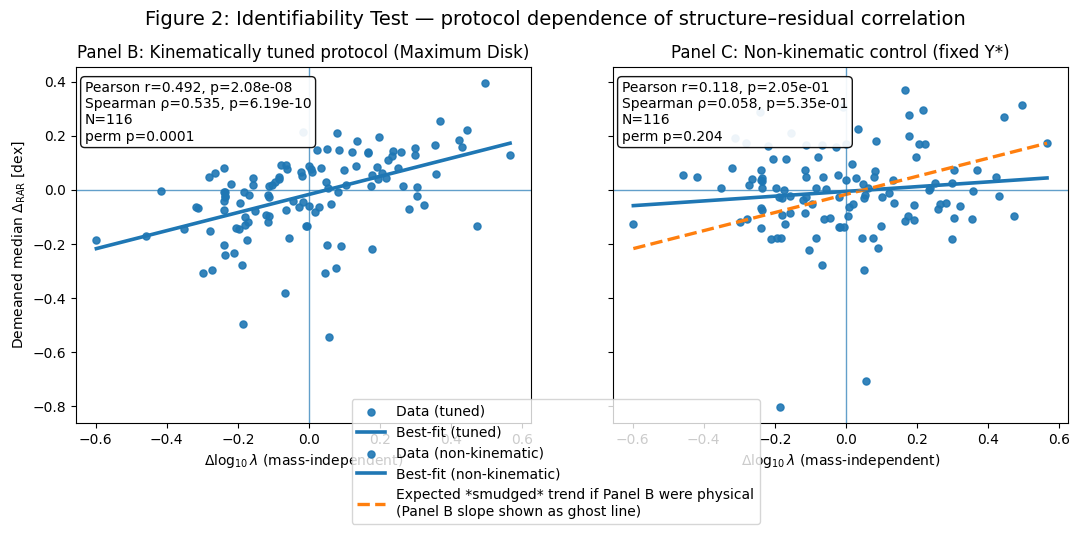

In [63]:
# ==========================================
# FIGURE 2 (FINAL) — Identifiability Test
# - Reads: P_FIG2_VALIDATION_USED.csv (locked)
# - Plots tuned vs blind, with ghost-line
# - Legends OUTSIDE (bottom), no overlap
# - Writes: Figure2_FINAL.png/.pdf + fingerprint
# ==========================================

import os, glob, hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive
from datetime import datetime, timezone

# ---------- SETTINGS ----------
P_CSV_EXPLICIT = ""  # optional hard-set path. Example:
# P_CSV_EXPLICIT = "/content/drive/MyDrive/sparc-paper-ii/figures/P_FIG2_VALIDATION_USED.csv"

OUT_DIR = "/content/drive/MyDrive/sparc-paper-ii/figures"
OUT_PNG = os.path.join(OUT_DIR, "Figure2_FINAL.png")
OUT_PDF = os.path.join(OUT_DIR, "Figure2_FINAL.pdf")
OUT_FP  = os.path.join(OUT_DIR, "Figure2_fingerprint.txt")

# ---------- HELPERS ----------
def sha256_file(path):
    h = hashlib.sha256()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(1024 * 1024), b""):
            h.update(chunk)
    return h.hexdigest()

def choose_csv():
    if P_CSV_EXPLICIT and os.path.exists(P_CSV_EXPLICIT):
        return P_CSV_EXPLICIT
    hits = glob.glob("/content/drive/MyDrive/**/P_FIG2_VALIDATION_USED.csv", recursive=True)
    if not hits:
        hits = glob.glob("/content/drive/MyDrive/**/P_FIG2_VALIDATION.csv", recursive=True)
    if not hits:
        raise FileNotFoundError(
            "Could not find P_FIG2_VALIDATION_USED.csv or P_FIG2_VALIDATION.csv under Drive.\n"
            "Fix: set P_CSV_EXPLICIT to the correct file path."
        )
    # Prefer the repo figures folder if present
    hits_sorted = sorted(hits, key=lambda p: ("sparc-paper-ii/figures" not in p, p))
    return hits_sorted[0]

def permutation_pvalue(x, y, r_obs, nperm=10000, seed=0):
    rng = np.random.default_rng(seed)
    x = np.asarray(x)
    y = np.asarray(y)
    r_null = np.empty(nperm, dtype=float)
    for i in range(nperm):
        xs = rng.permutation(x)
        r_null[i] = np.corrcoef(xs, y)[0, 1]
    # two-sided extreme
    p = (np.sum(np.abs(r_null) >= np.abs(r_obs)) + 1) / (nperm + 1)
    return p, r_null.mean(), r_null.std(ddof=1)

# ---------- RUN AND CALCULATE VARIABLES ----------
drive.mount("/content/drive", force_remount=False)
os.makedirs(OUT_DIR, exist_ok=True)

P_CSV = choose_csv()
df = pd.read_csv(P_CSV)

req = ["dloglam_massind", "dRAR_tuned_dm", "dRAR_fixed_dm"]
missing = [c for c in req if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns in {P_CSV}: {missing}\nColumns={list(df.columns)}")

# finite mask
m = np.isfinite(df["dloglam_massind"]) & np.isfinite(df["dRAR_tuned_dm"]) & np.isfinite(df["dRAR_fixed_dm"])
P = df.loc[m].copy()
x  = P["dloglam_massind"].values
yt = P["dRAR_tuned_dm"].values
yb = P["dRAR_fixed_dm"].values
N  = len(P)

# correlations
rt, pt = stats.pearsonr(x, yt)
rb, pb = stats.pearsonr(x, yb)
rhot, p_spt = stats.spearmanr(x, yt)
rhob, p_spb = stats.spearmanr(x, yb)

# best-fit lines
mt, bt = np.polyfit(x, yt, 1)
mb, bb = np.polyfit(x, yb, 1)

# permutation null p-values
pperm_t, mu_t, sig_t = permutation_pvalue(x, yt, rt, nperm=10000, seed=0)
pperm_b, mu_b, sig_b = permutation_pvalue(x, yb, rb, nperm=10000, seed=1)


# ----------------------------
# FIGURE 2 PLOT (layout-safe, no overlaps)
# ----------------------------
# plotting (legends outside; no overlap with titles)
fig, axs = plt.subplots(1, 2, figsize=(12.8, 5.4), sharey=True)
axB, axC = axs  # <-- FIX: define these names so later code never breaks

# Slightly higher suptitle; we will reserve top space explicitly
fig.suptitle(
    "Figure 2: Identifiability Test — protocol dependence of structure–residual correlation",
    fontsize=14, y=0.985
)

xx = np.linspace(x.min(), x.max(), 200)

# ---------- Panel B ----------
axB.scatter(x, yt, s=26, alpha=0.90, label="Data (tuned)")
axB.plot(xx, mt*xx + bt, lw=2.6, label="Best-fit (tuned)")
axB.axhline(0, lw=1, alpha=0.7)
axB.axvline(0, lw=1, alpha=0.7)
axB.set_title("Panel B: Kinematically tuned protocol (Maximum Disk)", fontsize=12)
axB.set_xlabel(r"$\Delta \log_{10}\lambda$ (mass-independent)")
axB.set_ylabel(r"Demeaned median $\Delta_{\rm RAR}$ [dex]")

txtB = (
    f"Pearson r={rt:.3f}, p={pt:.2e}\n"
    f"Spearman ρ={rhot:.3f}, p={p_spt:.2e}\n"
    f"N={N}\n"
    f"perm p={pperm_t:.4f}"
)
axB.text(
    0.02, 0.96, txtB, transform=axB.transAxes,
    va="top", ha="left",
    bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.92)
)

# ---------- Panel C ----------
axC.scatter(x, yb, s=26, alpha=0.90, label="Data (non-kinematic)")
axC.plot(xx, mb*xx + bb, lw=2.6, label="Best-fit (non-kinematic)")
axC.plot(
    xx, mt*xx + bt, lw=2.4, ls="--",
    label="Expected *smudged* trend if Panel B were physical\n(Panel B slope shown as ghost line)"
)
axC.axhline(0, lw=1, alpha=0.7)
axC.axvline(0, lw=1, alpha=0.7)
axC.set_title(r"Panel C: Non-kinematic control (fixed $\Upsilon*$)", fontsize=12)
axC.set_xlabel(r"$\Delta \log_{10}\lambda$ (mass-independent)")

txtC = (
    f"Pearson r={rb:.3f}, p={pb:.2e}\n"
    f"Spearman ρ={rhob:.3f}, p={p_spb:.2e}\n"
    f"N={N}\n"
    f"perm p={pperm_b:.3f}"
)
axC.text(
    0.02, 0.96, txtC, transform=axC.transAxes,
    va="top", ha="left",
    bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.92)
)

# ---------- SINGLE LEGEND (bottom, never overlapping titles) ----------
handles, labels = [], []
for ax in (axB, axC):
    h, l = ax.get_legend_handles_labels()
    handles += h; labels += l

# de-duplicate while preserving order
seen = set()
h2, l2 = [], []
for h, l in zip(handles, labels):
    if l not in seen:
        h2.append(h); l2.append(l); seen.add(l)

# Put legend in its own bottom band
fig.legend(
    h2, l2,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.02),
    ncol=1,
    frameon=True,
    fontsize=10
)

# Reserve space:
# - top for suptitle
# - bottom for legend band
fig.subplots_adjust(top=0.88, bottom=0.22, wspace=0.18)

plt.savefig(OUT_PNG, dpi=220, bbox_inches="tight")
plt.savefig(OUT_PDF, bbox_inches="tight")
plt.show()

# fingerprint
mtime = pd.to_datetime(os.path.getmtime(P_CSV), unit="s").strftime("%Y-%m-%d %H:%M:%S")
sha16 = sha256_file(P_CSV)[:16]
with open(OUT_FP, "w") as f:
    f.write("FIGURE 2 FINGERPRINT\n")
    f.write(f"CSV used: {P_CSV}\n")
    f.write(f"CSV mtime: {mtime}\n")
    f.write(f"CSV sha256[:16]: {sha16}\n")
    f.write(f"N finite: {N}\n")
    f.write(f"Tuned Pearson r={rt:.6f}, p={pt:.6e}\n")
    f.write(f"Blind Pearson r={rb:.6f}, p={pb:.6e}\n")
    f.write(f"Tuned Spearman rho={rhot:.6f}, p={p_spt:.6e}\n")
    f.write(f"Blind Spearman rho={rhob:.6f}, p={p_spb:.6e}\n")
    f.write(f"Perm tuned p={pperm_t:.6f}, null(mu={mu_t:.6f}, sig={sig_t:.6f})\n")
    f.write(f"Perm blind p={pperm_b:.6f}, null(mu={mu_b:.6f}, sig={sig_b:.6f})\n")
    f.write(f"Ghost line (tuned fit): m={mt:.6f}, b={bt:.6f}\n")

print("Wrote:", OUT_PNG)
print("Wrote:", OUT_PDF)
print("Wrote:", OUT_FP)
print("CSV sha256[:16]:", sha16)


#Figure 3 — Instrument Cross-Validation (WISE vs SPARC 3.6 µm)
Instrument cross-validation of compactness: WISE W1 vs SPARC 3.6 µm for matched galaxies.

#Purpose: Cross-check λ rankings using independent stellar mass proxy (WISE W1) vs SPARC 3.6μm; demonstrate high ranking stability despite a modest systematic offset; fixes KS p-value display to avoid false “0.0%” formatting.
#Inputs: WISE_matched_lambda_table.csv with columns loglam_sp, loglam_w.
#Outputs: figure PNG/PDF + Figure3_fingerprint.txt.

SPARE:
Addressed the exact failure mode from the forensic audit: KS p must not render as “0.0%”.

Locked fingerprint confirms:
	•	Matched N=79
	•	KS: D=0.2025, p=0.078154 (7.8%)
	•	Median offset: Δlogλ=+0.102863 dex, MAD=0.120730 dex
	•	Ranking stability: Pearson r=0.991994, Spearman ρ=0.983106

Interpretation is now rhetorically strong: the offset exists (expected wavelength/stellar population systematics), but the ordering is preserved—that’s the robustness win.

Aesthetic/layout issue you still have: the bottom legend and the long footer line are competing. Pick one primary “bottom band”:
	•	Either keep the legend below and move the stats into a clean single-line caption under the figure (preferred for journals),
	•	Or keep the stats line and shrink the legend to the minimum (or put legend inside empty whitespace only).

Right now it’s readable, but not “journal-clean” yet.

Also: if you want Figure 3 to “feel like the old (better) one”, bring back the clearer contrast by:
	•	keeping the 1:1 line prominent,
	•	keeping histogram fills clearly distinct (yours are good),
	•	and not adding any extra boxes inside panels.

Data (exact scope)
	•	SPARC side: same SPARC canonical table (after cuts) for R_{\rm eff} and 3.6µm luminosity / derived M_\star recipe.
	•	WISE side: wise_ii.table1.txt parsed into log M_{\star,\rm W1}.
	•	Matched subset: galaxies present in both datasets and passing the same selection criteria.
	•	Matched sample size: N = 79 (your script output)

Method (what you did)
	•	Compute a compactness proxy (same definition) separately:
	•	SPARC/3.6µm-based: \log\lambda_{\rm sp}
	•	WISE/W1-based: \log\lambda_{\rm w} using WISE stellar masses
	•	Compute paired difference:
\Delta \log\lambda = \log\lambda_{\rm w} - \log\lambda_{\rm sp}
	•	Report paired agreement (galaxy-by-galaxy) and distribution-level agreement:
	•	Pearson correlation between \log\lambda_{\rm w} and \log\lambda_{\rm sp}
	•	Spearman rank correlation
	•	KS test between the two distributions (note: sensitive to location shifts)

Locked results (use these exact values)
	•	Matched N = 79
	•	KS: D = 0.203, p = 0.078
	•	Median offset: \mathrm{median}(\Delta \log\lambda) = +0.103 dex
MAD = 0.121 dex
	•	Paired correlations:
Pearson r = 0.992, p = 5.83×10⁻⁷¹
Spearman ρ = 0.983, p = 1.51×10⁻⁵⁸

Interpretation sentence you can safely use
	•	“The paired statistics show extremely strong galaxy-by-galaxy agreement, while the KS test is borderline because it is sensitive to the measured ~0.10 dex location shift between instruments.”

What the figure supports (tight claim)
	•	The compactness ranking / relative scaling is robust to instrument choice (WISE vs Spitzer/3.6µm), with a small systematic offset consistent with bandpass/calibration differences.


In [ ]:
# ==========================================================
# FIGURE 3 — WISE vs SPARC validation — STANDALONE CELL
# - Auto-finds the matched CSV (no hardcoded missing path)
# - Accepts your columns: loglam_sp, loglam_w, dloglam_w_minus_sp
# - Fixes KS label formatting (no "p=0.0%")
# - Legend below, no overlaps
# - Saves outputs to: /content/drive/MyDrive/sparc-paper-ii/figures/
# ==========================================================

import os, glob, hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
from scipy.stats import ks_2samp, pearsonr, spearmanr

# ----------------------------
# Drive + Output folder (LOCKED)
# ----------------------------
drive.mount("/content/drive", force_remount=False)
OUTDIR = "/content/drive/MyDrive/sparc-paper-ii/figures"
os.makedirs(OUTDIR, exist_ok=True)

# ----------------------------
# Auto-find matched CSV
# Priority:
# 1) Option2 folder
# 2) sparc-paper-ii/figures
# 3) anywhere under MyDrive
# ----------------------------
def sha256_file(path):
    h = hashlib.sha256()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(1024*1024), b""):
            h.update(chunk)
    return h.hexdigest()

def find_candidate_csv():
    patterns = [
        "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/**/*.csv",
        "/content/drive/MyDrive/sparc-paper-ii/figures/**/*.csv",
        "/content/drive/MyDrive/**/*.csv",
    ]
    hits = []
    for pat in patterns:
        hits.extend(glob.glob(pat, recursive=True))
    # Keep only ones that look like your WISE matched table (by columns)
    candidates = []
    for p in hits:
        try:
            d = pd.read_csv(p, nrows=5)
        except:
            continue
        cols = set(d.columns)
        if {"loglam_sp", "loglam_w"}.issubset(cols):
            candidates.append(p)
    return candidates

cands = find_candidate_csv()
if not cands:
    raise FileNotFoundError(
        "Could not find any matched WISE/SPARC CSV with columns {loglam_sp, loglam_w} under MyDrive.\n"
        "Fix: ensure your WISE validation script wrote the matched CSV somewhere under Drive."
    )

# Prefer a file with 'WISE' or 'matched' in name, else pick most recently modified
def pick_best(paths):
    scored = []
    for p in paths:
        name = os.path.basename(p).lower()
        score = 0
        if "wise" in name: score += 3
        if "match" in name: score += 2
        if "lambda" in name or "lam" in name: score += 1
        scored.append((score, os.path.getmtime(p), p))
    scored.sort(reverse=True)
    return scored[0][2]

MATCHED_CSV = pick_best(cands)

df = pd.read_csv(MATCHED_CSV)

# Validate required columns
req = ["loglam_sp", "loglam_w"]
missing = [c for c in req if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns {missing} in {MATCHED_CSV}\nColumns: {list(df.columns)}")

logsp = pd.to_numeric(df["loglam_sp"], errors="coerce").to_numpy()
logw  = pd.to_numeric(df["loglam_w"],  errors="coerce").to_numpy()

mask = np.isfinite(logsp) & np.isfinite(logw)
logsp = logsp[mask]
logw  = logw[mask]
N = len(logsp)
if N < 10:
    raise ValueError(f"Too few matched rows after filtering (N={N}).")

d = logw - logsp
med = float(np.nanmedian(d))
mad = float(np.nanmedian(np.abs(d - med)))

# Stats
ks = ks_2samp(logw, logsp)
ksD, ksp = float(ks.statistic), float(ks.pvalue)

rp, rpp = pearsonr(logsp, logw)
rs, rsp = spearmanr(logsp, logw)

# ----------------------------
# Plot
# ----------------------------
fig = plt.figure(figsize=(14.5, 5.8), dpi=180)
gs = fig.add_gridspec(1, 3, wspace=0.30)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

# Panel 1: scatter + 1:1
ax1.scatter(logsp, logw, s=28, alpha=0.85)
mn = np.nanmin([logsp.min(), logw.min()])
mx = np.nanmax([logsp.max(), logw.max()])
ax1.plot([mn, mx], [mn, mx], lw=2.0, label="1:1")
ax1.set_xlabel("SPARC logλ", fontsize=12)
ax1.set_ylabel("WISE logλ", fontsize=12)
ax1.set_title("WISE vs SPARC (paired)", fontsize=13)
ax1.grid(True, alpha=0.25)

# Panel 2: overlapping hist (density)
bins = 16
ax2.hist(logsp, bins=bins, density=True, alpha=0.55, label="SPARC 3.6µm")
ax2.hist(logw,  bins=bins, density=True, alpha=0.55, label="WISE W1")
ax2.axvline(np.nanmedian(logsp), lw=1.5, alpha=0.9)
ax2.axvline(np.nanmedian(logw),  lw=1.5, alpha=0.9)
ax2.set_xlabel("logλ", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)
ax2.set_title("Distribution (matched)", fontsize=13)
ax2.grid(True, alpha=0.25)

# Panel 3: offset vs scale + lines
ax3.scatter(logsp, d, s=28, alpha=0.85, label="Δlogλ(WISE−SPARC)")
ax3.axhline(0.0, lw=1.6, label="Δ=0")
ax3.axhline(med, lw=2.0, ls="--", label=f"median Δ={med:+.3f} dex")
ax3.set_xlabel("SPARC logλ", fontsize=12)
ax3.set_ylabel("Δlogλ (WISE − SPARC)", fontsize=12)
ax3.set_title("Offset vs. scale", fontsize=13)
ax3.grid(True, alpha=0.25)

# Title
fig.suptitle("Figure 3: WISE vs SPARC (matched galaxies)", fontsize=18, y=0.98)

# Bottom legend (single legend for all)
handles, labels = [], []
for ax in [ax1, ax2, ax3]:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels  += l

# Remove duplicates while preserving order
seen = set()
h2, l2 = [], []
for h,l in zip(handles, labels):
    if l not in seen:
        h2.append(h); l2.append(l); seen.add(l)

fig.legend(h2, l2, loc="lower center", ncol=4, frameon=True, bbox_to_anchor=(0.5, 0.04))

# Footer stats (NO overlap, below)
footer = (
    f"Matched N={N} | KS D={ksD:.3f}, p={ksp:.3f} (={100*ksp:.1f}%) | "
    f"Median Δlogλ={med:+.3f} dex, MAD={mad:.3f} dex | "
    f"Pearson r={rp:.3f} (p={rpp:.2e}) | Spearman ρ={rs:.3f} (p={rsp:.2e})"
)
fig.text(0.5, 0.01, footer, ha="center", va="bottom", fontsize=10)

fig.subplots_adjust(bottom=0.20)

# ----------------------------
# Save outputs
# ----------------------------
FIG3_PNG = os.path.join(OUTDIR, "Figure3_FINAL.png")
FIG3_PDF = os.path.join(OUTDIR, "Figure3_FINAL.pdf")
FIG3_FPR = os.path.join(OUTDIR, "Figure3_fingerprint.txt")

fig.savefig(FIG3_PNG, bbox_inches="tight")
fig.savefig(FIG3_PDF, bbox_inches="tight")

fingerprint = f"""FIGURE 3 FINGERPRINT
Matched CSV: {MATCHED_CSV}
CSV sha256: {sha256_file(MATCHED_CSV)[:16]}
N={N}
KS D={ksD:.6f}
KS p={ksp:.6f}
Median dloglam(WISE-SPARC)={med:.6f} dex
MAD={mad:.6f} dex
Pearson r={rp:.6f}, p={rpp:.6e}
Spearman rho={rs:.6f}, p={rsp:.6e}
"""
with open(FIG3_FPR, "w") as f:
    f.write(fingerprint)

plt.show()
print("Using matched CSV:", MATCHED_CSV)
print("Wrote:", FIG3_PNG)
print("Wrote:", FIG3_PDF)
print("Wrote:", FIG3_FPR)

#COLAB SCRIPT: xGASS Phase-1 Context Figures - Appendix A1 (xGASS population context)

Loads xGASS representative sample with censoring, splits detections vs 5σ limits, overlays SPARC on log(MHI/M⋆) vs log(M⋆), and reports overlap coverage within xGASS mass limits. Adds a confusion-flag sensitivity note (optional). Writes PNG/PDF + fingerprint.

In [ ]:
# Example update if file is in a different folder
XGASS_PATH = "/content/drive/MyDrive/path/to/xGASS_representative_sample.csv"

In [ ]:
# ============================
# COLAB SCRIPT: xGASS Phase-1 Context Figures
# Reproduces:
#   (1) NUV-r vs log M*
#   (2) log(MHI/M*) vs log M*
# Using detection logic:
#   HI detection: HIsrc < 4
#   HI non-detection (upper limit): HIsrc == 4
# ============================

!pip -q install pandas numpy matplotlib

import os, zipfile, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# ----------------------------
# USER CONFIG
# ----------------------------
# Set this to the root folder name you mentioned
ROOT_FOLDER_NAME = "251229_SPARC_VIZIER_DATASET!"

# Optional: if you know the folder path already, set it explicitly
# Example:
# ROOT = "/content/drive/MyDrive/251229_SPARC_VIZIER_DATASET!"
ROOT = None

# OUT_DIR = "/content/xgass_outputs" # No longer needed, saving directly to ROOT
os.makedirs("/content/xgass_outputs", exist_ok=True) # Keep for intermediate files like unzipped xGASS if needed

# ----------------------------
# HELPERS: find files in Drive
# ----------------------------
def find_root_folder():
    global ROOT
    if ROOT is not None:
        return ROOT
    base = "/content/drive/MyDrive"
    candidates = []
    for dirpath, dirnames, filenames in os.walk(base):
        for d in dirnames:
            if d == ROOT_FOLDER_NAME:
                candidates.append(os.path.join(dirpath, d))
    if not candidates:
        raise FileNotFoundError(f"Could not find folder named '{ROOT_FOLDER_NAME}' under {base}")
    # Pick the shortest path (usually the “closest” match)
    ROOT = sorted(candidates, key=len)[0]
    return ROOT

def find_any(patterns, root):
    """
    patterns: list of regex patterns
    returns: list of matching full paths
    """
    hits = []
    for dirpath, dirnames, filenames in os.walk(root):
        for fn in filenames:
            for pat in patterns:
                if re.search(pat, fn, flags=re.IGNORECASE):
                    hits.append(os.path.join(dirpath, fn))
                    break
    return hits

# ----------------------------
# LOAD xGASS representative sample
# ----------------------------
def read_xgass_representative_ascii(path):
    """
    Reads the xGASS representative ASCII file where the first line is a header beginning with '#'
    followed by whitespace-delimited columns.
    """
    with open(path, "r") as f:
        header = f.readline()
    if not header.strip().startswith("#"):
        raise ValueError("Expected first line header starting with '#'")

    cols = header.lstrip("#").strip().split()
    df = pd.read_csv(path, sep=r"\s+", skiprows=1, names=cols, engine="python")

    # Replace common sentinel missing values
    for c in df.columns:
        if df[c].dtype.kind in "if":
            df.loc[df[c].isin([-99, -99.0, -999, -999.0, 99, 99.0]), c] = np.nan

    return df

def maybe_unzip_xgass(zip_path, extract_dir):
    os.makedirs(extract_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_dir)
    return extract_dir

# ----------------------------
# MAIN
# ----------------------------
root = find_root_folder()
print("Root folder:", root)

# Look for the representative ASCII directly OR xGASS.zip
ascii_hits = find_any([r"xgass.*representative.*\.ascii$", r"xGASS_representative_sample\.ascii$"], root)
zip_hits   = find_any([r"^xgass\.zip$", r"xgass.*\.zip$"], root)

if not ascii_hits and not zip_hits:
    raise FileNotFoundError("Could not find xGASS representative ASCII or xGASS.zip inside the root folder.")

# Prefer ASCII if present; else unzip and search inside extracted
if ascii_hits:
    rep_path = ascii_hits[0]
    print("Found xGASS representative ASCII:", rep_path)
else:
    zip_path = zip_hits[0]
    print("Found xGASS zip:", zip_path)
    extract_dir = "/content/xgass_extracted"
    maybe_unzip_xgass(zip_path, extract_dir)
    # search extracted
    extracted_hits = find_any([r"xgass.*representative.*\.ascii$", r"xGASS_representative_sample\.ascii$"], extract_dir)
    if not extracted_hits:
        raise FileNotFoundError("Unzipped xGASS.zip but could not find representative ASCII inside.")
    rep_path = extracted_hits[0]
    print("Found representative ASCII inside zip:", rep_path)

# Load table
df = read_xgass_representative_ascii(rep_path)

# ----------------------------
# REQUIRED COLUMNS CHECK
# ----------------------------
required = ["lgMstar", "lgMHI", "NUVr", "HIsrc"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns in xGASS table: {missing}")

# Detection logic (robust rule in xGASS representative sample)
# HIsrc = 3: xGASS detection
# HIsrc = 4: xGASS non-detection (upper limit)
# HIsrc may also be 1/2 for ALFALFA/other sources; those are detections
df["is_detected"] = df["HIsrc"].astype(float) < 4

# Derived quantities
df["lgGF_calc"] = df["lgMHI"] - df["lgMstar"]  # log(MHI/M*)
mstar = 10**df["lgMstar"]
mhi = 10**df["lgMHI"]
df["lgMbar_calc"] = np.log10(mstar + 1.33*mhi)  # baryonic mass using helium correction

# Quick metrics
n_total = len(df)
n_det = int(df["is_detected"].sum())
n_lim = n_total - n_det
n_conf = int((df["HIconf_flag"]==1).sum()) if "HIconf_flag" in df.columns else None

print("\n=== xGASS loaded ===")
print("N total:", n_total)
print("HI detections (HIsrc<4):", n_det)
print("HI non-detections (HIsrc=4):", n_lim)
if n_conf is not None:
    print("Confusion-flagged (HIconf_flag==1):", n_conf)

# Weighted detection fraction (only if weight exists)
if "weight" in df.columns and df["weight"].notna().sum() > 0:
    w = df["weight"].fillna(0.0)
    det_frac_w = w[df["is_detected"].astype(bool)].sum() / w.sum() if w.sum() > 0 else np.nan
    print("Detection fraction (unweighted):", round(n_det/n_total, 3))
    print("Detection fraction (weighted):  ", round(float(det_frac_w), 3))
else:
    print("No 'weight' column found or weights missing; skipping weighted metrics.")

# ----------------------------
# FIGURE 1: NUV-r vs log M*
# ----------------------------
mask_all = df["lgMstar"].notna() & df["NUVr"].notna()
mask_det = mask_all & df["is_detected"]
mask_lim = mask_all & (~df["is_detected"])

plt.figure(figsize=(7.5, 6))
plt.scatter(df.loc[mask_all, "lgMstar"], df.loc[mask_all, "NUVr"], s=10, alpha=0.15)
plt.scatter(df.loc[mask_det, "lgMstar"], df.loc[mask_det, "NUVr"], s=12, alpha=0.35, marker="o")
plt.scatter(df.loc[mask_lim, "lgMstar"], df.loc[mask_lim, "NUVr"], s=14, alpha=0.35, marker="v")

plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.ylabel(r"$NUV-r$")
plt.gca().invert_yaxis()
plt.title("xGASS: Color–Mass Context (detections vs limits)")

# Legend
plt.scatter([], [], s=12, alpha=0.35, marker="o", label="HI detected (HIsrc<4)")
plt.scatter([], [], s=14, alpha=0.35, marker="v", label="HI non-detection (HIsrc=4; upper limit)")
plt.legend(frameon=False, loc="upper right")

fig1_path = os.path.join("/content/xgass_outputs", "xGASS_context_NUVr_vs_Mstar.png") # Save to xgass_outputs, not root
plt.tight_layout()
plt.savefig(fig1_path, dpi=200)
plt.show()
print("Saved:", fig1_path)

# ----------------------------
# FIGURE 2: log(MHI/M*) vs log M*
# Use catalog lgGF if it exists; else computed
# ----------------------------
ycol = "lgGF" if "lgGF" in df.columns else "lgGF_calc"
use_y = df[ycol]

mask2_all = df["lgMstar"].notna() & use_y.notna()
mask2_det = mask2_all & df["is_detected"]
mask2_lim = mask2_all & (~df["is_detected"])

plt.figure(figsize=(7.5, 6))
plt.scatter(df.loc[mask2_lim, "lgMstar"], use_y.loc[mask2_lim], s=16, alpha=0.35, marker="v")
plt.scatter(df.loc[mask2_det, "lgMstar"], use_y.loc[mask2_det], s=14, alpha=0.35, marker="o")

plt.xlabel(r"$\log_{10}(M_\star/M_\odot)$")
plt.ylabel(r"$\log_{10}(M_{\rm HI}/M_\star)$")
plt.title("xGASS: HI Gas Fraction Plane (detections vs limits)")

plt.scatter([], [], s=14, alpha=0.35, marker="o", label="HI detected")
plt.scatter([], [], s=16, alpha=0.35, marker="v", label="HI non-detection (upper limit)")
plt.legend(frameon=False, loc="lower left")

fig2_path = os.path.join("/content/xgass_outputs", "xGASS_context_lgGF_vs_Mstar.png") # Save to xgass_outputs, not root
plt.tight_layout()
plt.savefig(fig2_path, dpi=200)
plt.show()
print("Saved:", fig2_path)

# ----------------------------
# OPTIONAL: write a clean CSV for later merges
# ----------------------------
clean_cols = [c for c in ["GASSID","RA","DEC","lgMstar","lgMHI","NUVr","HIsrc","HI_FLAG","HIconf_flag","weight",
                          "lgGF","lgGF_calc","lgMbar_calc","lgmust","SFR_best","SFRerr_best","SFRcase_best",
                          "env_code_B","logMh_Mst_B"] if c in df.columns]

clean_path = os.path.join(root, "xGASS_representative_clean_minimal.csv") # Save clean CSV to user's specified ROOT folder
df[clean_cols].to_csv(clean_path, index=False)
print("Wrote clean minimal table:", clean_path)


In [ ]:
# --- Colab: Mount Drive ---
from google.colab import drive
drive.mount("/content/drive")

import os, re, json, time, hashlib
from datetime import datetime, timezone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# OUTPUT DIRECTORY (LOCKED)
# ----------------------------
OUTDIR = "/content/drive/MyDrive/sparc-paper-ii/figures"
os.makedirs(OUTDIR, exist_ok=True)
print("OUTDIR =", OUTDIR)

# ----------------------------
# INPUT FILES (EDIT THESE ONLY)
# ----------------------------
# xGASS main table (CSV). Must include M*, NUV-r, and HI info (detections + upper limits).
XGASS_CSV = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/xGASS_representative_clean_minimal.csv" # Corrected path to generated file

# Optional: if xGASS is split into separate files, point to the one you are using.
# XGASS_CSV = "/content/drive/MyDrive/.../xGASS.csv"

# SPARC canonical table (for SPARC overlay on gas fraction plot)
SPARC_CANONICAL_CSV = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/SPARC_Canonical123.csv"

# If you have a SPARC <-> GALEX crossmatch providing NUV-r, set it here (optional)
SPARC_NUVR_CSV = ""  # e.g. "/content/drive/MyDrive/.../SPARC_GALEX_NUVr.csv"

In [ ]:
def _norm(s: str) -> str:
    return re.sub(r"[^a-z0-9]+", "", str(s).strip().lower())

def pick_col(df, candidates, required=True):
    """
    Pick the first matching column by normalized name.
    candidates: list of candidate column names (strings), compared by normalization.
    """
    norm_map = {_norm(c): c for c in df.columns}
    for cand in candidates:
        key = _norm(cand)
        if key in norm_map:
            return norm_map[key]
    if required:
        raise ValueError(f"Missing required column. Tried: {candidates}\nAvailable: {list(df.columns)}")
    return None

def sha256_file(path, chunk=1024*1024):
    h = hashlib.sha256()
    with open(path, "rb") as f:
        while True:
            b = f.read(chunk)
            if not b:
                break
            h.update(b)
    return h.hexdigest()

def safe_log10(x):
    x = np.asarray(x, float)
    return np.log10(np.where(x > 0, x, np.nan))

In [ ]:
if not os.path.exists(XGASS_CSV):
    raise FileNotFoundError(f"Missing XGASS_CSV:\n{XGASS_CSV}")

x = pd.read_csv(XGASS_CSV)
print("Loaded xGASS:", x.shape)

# --- Required physics axes ---
col_logMstar = pick_col(x, [
    "logMstar", "logMstar_chab", "logMstar_msun", "lgmstar", "logmstar"
])

col_nuvr = pick_col(x, [
    "NUV-r", "nuvr", "nuv_r", "NUVr", "NUV_r"
], required=False)

# --- HI information: detections + limits ---
# Try direct gas fraction first
col_loggas = pick_col(x, [
    "logMHI_Mstar", "log(MHI/M*)", "logMHIoverMstar", "logmhifrac", "loggasfrac"
], required=False)

# Otherwise need MHI itself (or logMHI) and a detection/limit indicator
col_logMHI = pick_col(x, ["logMHI", "lgmhi", "log_mhi"], required=False)
col_MHI    = pick_col(x, ["MHI", "MHI_Msun", "MHI_msun", "mhi"], required=False)

# detection flag candidates (xGASS variants differ)
col_det = pick_col(x, [
    "HI_detect", "HI_det", "detect", "det", "HIdet", "HIdetect"
], required=False)

# upper-limit column sometimes exists (e.g., logMHI_lim)
col_logMHI_lim = pick_col(x, [
    "logMHI_lim", "logMHI_limit", "logMHI_ul", "logmhi_ul", "logmhi_lim"
], required=False)

# confusion flag (optional but recommended)
col_conf = pick_col(x, [
    "HIconf_flag", "HI_conf_flag", "conf_flag", "confused"
], required=False)

# weights (optional)
col_w = pick_col(x, [
    "weight", "w", "wgt", "survey_weight", "w_surv"
], required=False)

# --- Build standardized columns ---
x_std = x.copy()

x_std["logMstar"] = pd.to_numeric(x_std[col_logMstar], errors="coerce")

if col_nuvr:
    x_std["NUV_r"] = pd.to_numeric(x_std[col_nuvr], errors="coerce")
else:
    x_std["NUV_r"] = np.nan

# Derive log gas fraction
if col_loggas:
    x_std["logMHI_Mstar"] = pd.to_numeric(x_std[col_loggas], errors="coerce")
else:
    # if logMHI exists, compute log(MHI/M*)
    if col_logMHI is not None:
        x_std["logMHI"] = pd.to_numeric(x_std[col_logMHI], errors="coerce")
    elif col_MHI is not None:
        x_std["logMHI"] = safe_log10(pd.to_numeric(x_std[col_MHI], errors="coerce"))
    else:
        x_std["logMHI"] = np.nan

    x_std["logMHI_Mstar"] = x_std["logMHI"] - x_std["logMstar"]

# Detect vs limit classification
if col_det is not None:
    det_raw = x_std[col_det]
    # normalize booleans/ints/strings
    if det_raw.dtype == bool:
        x_std["is_detect"] = det_raw
    else:
        det_num = pd.to_numeric(det_raw, errors="coerce")
        if det_num.notna().any():
            x_std["is_detect"] = det_num.astype(float) > 0
        else:
            x_std["is_detect"] = det_raw.astype(str).str.strip().str.lower().isin(["1","true","t","yes","y","det","detect"])
else:
    # fallback: if limit column exists, non-null limit implies non-detection
    if col_logMHI_lim is not None:
        lim = pd.to_numeric(x_std[col_logMHI_lim], errors="coerce")
        x_std["is_detect"] = lim.isna()  # no limit -> detection (common convention)
        # also set logMHI_Mstar for limits where missing
        # (Only if logMstar exists and limits are in logMHI)
        m = (~x_std["is_detect"]) & lim.notna() & x_std["logMstar"].notna()
        # store limit in gas fraction as limit - logM*
        x_std.loc[m, "logMHI_Mstar"] = lim.loc[m] - x_std.loc[m, "logMstar"]
    else:
        # last fallback: treat finite values as detections
        x_std["is_detect"] = np.isfinite(x_std["logMHI_Mstar"].values)

# Confusion flag
if col_conf is not None:
    x_std["HIconf_flag"] = pd.to_numeric(x_std[col_conf], errors="coerce").fillna(0).astype(int)
else:
    x_std["HIconf_flag"] = 0

# Weight
if col_w is not None:
    x_std["w"] = pd.to_numeric(x_std[col_w], errors="coerce")
else:
    x_std["w"] = np.nan

# Clean finite ranges
x_std["logMstar"] = pd.to_numeric(x_std["logMstar"], errors="coerce")
x_std["logMHI_Mstar"] = pd.to_numeric(x_std["logMHI_Mstar"], errors="coerce")
x_std["NUV_r"] = pd.to_numeric(x_std["NUV_r"], errors="coerce")

print("xGASS standardized columns:")
print(x_std[["logMstar","NUV_r","logMHI_Mstar","is_detect","HIconf_flag","w"]].head())
print("Detections:", int(x_std["is_detect"].sum()), " / ", len(x_std))

In [ ]:
sparc = None
if SPARC_CANONICAL_CSV and os.path.exists(SPARC_CANONICAL_CSV):
    s = pd.read_csv(SPARC_CANONICAL_CSV)
    print("Loaded SPARC canonical:", s.shape)

    # Column candidates in your SPARC_Canonical123.csv schema
    c_L36 = pick_col(s, ["L3.6_GLsun", "L36_GLsun", "L36"], required=True)
    c_MHI = pick_col(s, ["MHI_GMsun", "MHI"], required=True)
    c_Q   = pick_col(s, ["Qual", "Q"], required=True)
    c_i   = pick_col(s, ["i_deg", "i"], required=True)
    c_name= pick_col(s, ["Name", "Galaxy"], required=True)

    s["Galaxy"] = s[c_name].astype(str)
    s["Q"] = pd.to_numeric(s[c_Q], errors="coerce")
    s["i"] = pd.to_numeric(s[c_i], errors="coerce")

    # Match your Paper II cuts (keeps consistency)
    s_sel = s[(s["Q"] <= 2) & (s["i"] > 30) & (s["i"] < 80)].copy()

    # Mstar proxy used in your pipeline: Υ*=0.5 at 3.6um
    # L3.6_GLsun is in G Lsun => convert to Lsun
    L36_Lsun = pd.to_numeric(s_sel[c_L36], errors="coerce") * 1e9
    Mstar = 0.5 * L36_Lsun  # Msun
    MHI   = pd.to_numeric(s_sel[c_MHI], errors="coerce") * 1e9  # G Msun -> Msun

    s_sel["logMstar"] = safe_log10(Mstar)
    s_sel["logMHI_Mstar"] = safe_log10(MHI) - s_sel["logMstar"]

    sparc = s_sel[["Galaxy","logMstar","logMHI_Mstar","Q","i"]].copy()
    print("SPARC selected N:", len(sparc))
else:
    print("SPARC overlay disabled (missing SPARC_CANONICAL_CSV).")

In [ ]:
def figsave(fig, stem):
    png = os.path.join(OUTDIR, f"{stem}.png")
    pdf = os.path.join(OUTDIR, f"{stem}.pdf")
    fig.savefig(png, dpi=220, bbox_inches="tight")
    fig.savefig(pdf, bbox_inches="tight")
    plt.close(fig)
    return png, pdf

def bottom_legend(fig, handles, labels, ncol=3, y=-0.02):
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, y),
               ncol=ncol, frameon=True)

def compute_stats_block(df):
    N = len(df)
    nd = int(df["is_detect"].sum())
    nl = N - nd
    det_frac = nd / N if N else np.nan
    w_det_frac = np.nan
    if df["w"].notna().any():
        w = df["w"].astype(float)
        m = np.isfinite(w.values)
        if m.sum() > 0:
            w_det_frac = np.sum(w[m] * df.loc[m, "is_detect"].astype(float)) / np.sum(w[m])
    return dict(N=N, nd=nd, nl=nl, det_frac=det_frac, w_det_frac=w_det_frac)

def percentile_band_by_mass(xg, bins, qlo=0.10, qhi=0.90):
    # only detections define the locus (limits are depth-imprinted)
    det = xg[xg["is_detect"]].copy()
    out = []
    for lo, hi in zip(bins[:-1], bins[1:]):
        slab = det[(det["logMstar"] >= lo) & (det["logMstar"] < hi)]
        if len(slab) < 8:
            out.append((0.5*(lo+hi), np.nan, np.nan, len(slab)))
        else:
            out.append((0.5*(lo+hi),
                        np.nanquantile(slab["logMHI_Mstar"], qlo),
                        np.nanquantile(slab["logMHI_Mstar"], qhi),
                        len(slab)))
    return pd.DataFrame(out, columns=["logMstar_mid", "p10", "p90", "Nbin"])

In [ ]:
def plot_nuvr_vs_mass(xg, sparc_nuvr_df=None, tag="ALL"):
    # Prepare
    df = xg.copy()
    df = df[np.isfinite(df["logMstar"])].copy()

    fig = plt.figure(figsize=(10.5, 6.5), constrained_layout=True)
    ax = fig.add_subplot(111)

    det = df[df["is_detect"] & np.isfinite(df["NUV_r"])].copy()
    lim = df[(~df["is_detect"]) & np.isfinite(df["NUV_r"])].copy()

    h = []
    lab = []

    if len(det):
        sc1 = ax.scatter(det["logMstar"], det["NUV_r"], s=28, alpha=0.65, edgecolor="none")
        h.append(sc1); lab.append("xGASS detections")

    if len(lim):
        sc2 = ax.scatter(lim["logMstar"], lim["NUV_r"], s=36, alpha=0.65, marker="v", edgecolor="none")
        h.append(sc2); lab.append("xGASS non-detections (5σ upper limits)")

    # Optional SPARC overlay if provided
    if sparc_nuvr_df is not None and len(sparc_nuvr_df):
        sp = sparc_nuvr_df[np.isfinite(sparc_nuvr_df["logMstar"]) & np.isfinite(sparc_nuvr_df["NUV_r"])].copy()
        if len(sp):
            sc3 = ax.scatter(sp["logMstar"], sp["NUV_r"], s=60, alpha=0.95, marker="*", edgecolor="k", linewidth=0.3)
            h.append(sc3); lab.append("SPARC (matched NUV–r)")

    ax.set_xlabel(r"$\log_{10}(M_\star/M_\odot)$")
    ax.set_ylabel(r"NUV$-$r (mag)")
    ax.set_title(f"xGASS context: NUV–r vs $M_\\star$ ({tag})")

    ax.grid(True, alpha=0.25)
    bottom_legend(fig, h, lab, ncol=3, y=-0.02)

    stats = compute_stats_block(df)
    note = f"N={stats['N']} | det={stats['nd']} | limits={stats['nl']} | det.frac={stats['det_frac']:.3f}"
    if np.isfinite(stats["w_det_frac"]):
        note += f" | weighted det.frac={stats['w_det_frac']:.3f}"
    fig.text(0.5, -0.08, note, ha="center", fontsize=11)

    return fig

# HIconf sensitivity
fig1_all = plot_nuvr_vs_mass(x_std, tag="ALL")
png1, pdf1 = figsave(fig1_all, "Appendix_xGASS_NUVr_vs_Mstar_ALL")
print("Wrote:", png1, pdf1)

fig1_clean = plot_nuvr_vs_mass(x_std[x_std["HIconf_flag"]==0], tag="HIconf_flag==0")
png1c, pdf1c = figsave(fig1_clean, "Appendix_xGASS_NUVr_vs_Mstar_HIconf0")
print("Wrote:", png1c, pdf1c)

In [ ]:
def plot_gasfrac_vs_mass(xg, sparc_df=None, tag="ALL"):
    df = xg[np.isfinite(xg["logMstar"]) & np.isfinite(xg["logMHI_Mstar"])].copy()

    fig = plt.figure(figsize=(11.5, 6.8), constrained_layout=True)
    ax = fig.add_subplot(111)

    det = df[df["is_detect"]].copy()
    lim = df[~df["is_detect"]].copy()

    h, lab = [], []

    if len(det):
        sc1 = ax.scatter(det["logMstar"], det["logMHI_Mstar"], s=28, alpha=0.65, edgecolor="none")
        h.append(sc1); lab.append("xGASS detections")

    if len(lim):
        sc2 = ax.scatter(lim["logMstar"], lim["logMHI_Mstar"], s=36, alpha=0.65, marker="v", edgecolor="none")
        h.append(sc2); lab.append("xGASS non-detections (5σ upper limits)")

    # Percentile band (detections only)
    bins = np.arange(np.nanmin(df["logMstar"])-0.001, np.nanmax(df["logMstar"])+0.51, 0.5)
    band = percentile_band_by_mass(df, bins)
    if band["p10"].notna().any():
        ln1 = ax.plot(band["logMstar_mid"], band["p10"], lw=2, alpha=0.85)[0]
        ln2 = ax.plot(band["logMstar_mid"], band["p90"], lw=2, alpha=0.85)[0]
        h += [ln1, ln2]; lab += ["xGASS det p10", "xGASS det p90"]

    # SPARC overlay
    if sparc_df is not None and len(sparc_df):
        sp = sparc_df[np.isfinite(sparc_df["logMstar"]) & np.isfinite(sparc_df["logMHI_Mstar"])].copy()
        if len(sp):
            sc3 = ax.scatter(sp["logMstar"], sp["logMHI_Mstar"], s=60, alpha=0.95, marker="*", edgecolor="k", linewidth=0.3)
            h.append(sc3); lab.append("SPARC (Υ*=0.5 @3.6μm)")

            # Coverage metric: fraction of SPARC within xGASS detection p10–p90 band at fixed M* bin
            # (only for bins with enough xGASS detections)
            cov = []
            for _, row in band.dropna().iterrows():
                lo = row["logMstar_mid"] - 0.25
                hi = row["logMstar_mid"] + 0.25
                slab = sp[(sp["logMstar"] >= lo) & (sp["logMstar"] < hi)]
                if len(slab)==0 or not np.isfinite(row["p10"]) or not np.isfinite(row["p90"]):
                    continue
                inside = np.mean((slab["logMHI_Mstar"] >= row["p10"]) & (slab["logMHI_Mstar"] <= row["p90"]))
                cov.append((row["logMstar_mid"], len(slab), inside))
            if cov:
                cov_df = pd.DataFrame(cov, columns=["logMstar_mid","N_sparc_bin","frac_inside_p10p90"])
                overall = np.average(cov_df["frac_inside_p10p90"], weights=cov_df["N_sparc_bin"])
                fig.text(0.5, -0.09,
                         f"SPARC-in-xGASS coverage (detections p10–p90 at fixed M*): weighted mean = {overall:.3f}",
                         ha="center", fontsize=11)

    ax.set_xlabel(r"$\log_{10}(M_\star/M_\odot)$")
    ax.set_ylabel(r"$\log_{10}(M_{\rm HI}/M_\star)$")
    ax.set_title(f"xGASS context: H I gas fraction vs $M_\\star$ ({tag})")
    ax.grid(True, alpha=0.25)

    bottom_legend(fig, h, lab, ncol=4, y=-0.02)

    stats = compute_stats_block(df)
    note = f"N={stats['N']} | det={stats['nd']} | limits={stats['nl']} | det.frac={stats['det_frac']:.3f}"
    if np.isfinite(stats["w_det_frac"]):
        note += f" | weighted det.frac={stats['w_det_frac']:.3f}"
    fig.text(0.5, -0.13, note, ha="center", fontsize=11)

    return fig

fig2_all = plot_gasfrac_vs_mass(x_std, sparc_df=sparc, tag="ALL")
png2, pdf2 = figsave(fig2_all, "Appendix_xGASS_logMHIoverMstar_vs_Mstar_ALL")
print("Wrote:", png2, pdf2)

fig2_clean = plot_gasfrac_vs_mass(x_std[x_std["HIconf_flag"]==0], sparc_df=sparc, tag="HIconf_flag==0")
png2c, pdf2c = figsave(fig2_clean, "Appendix_xGASS_logMHIoverMstar_vs_Mstar_HIconf0")
print("Wrote:", png2c, pdf2c)

In [ ]:
def write_fingerprint(fig_stem, input_paths, outputs):
    fp = {
        "figure": fig_stem,
        "timestamp_utc": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S UTC"),
        "inputs": [],
        "outputs": [],
    }
    for p in input_paths:
        if p and os.path.exists(p):
            st = os.stat(p)
            fp["inputs"].append({
                "path": p,
                "bytes": int(st.st_size),
                "mtime_local": time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(st.st_mtime)),
                "sha256": sha256_file(p),
            })
    for p in outputs:
        if p and os.path.exists(p):
            st = os.stat(p)
            fp["outputs"].append({
                "path": p,
                "bytes": int(st.st_size),
                "mtime_local": time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(st.st_mtime)),
                "sha256": sha256_file(p),
            })
    out = os.path.join(OUTDIR, f"{fig_stem}_fingerprint.json")
    with open(out, "w", encoding="utf-8") as f:
        json.dump(fp, f, indent=2)
    print("Wrote fingerprint:", out)
    return out

# Record fingerprints
write_fingerprint("Appendix_xGASS_NUVr_vs_Mstar_ALL", [XGASS_CSV, SPARC_CANONICAL_CSV, SPARC_NUVR_CSV], [png1, pdf1])
write_fingerprint("Appendix_xGASS_NUVr_vs_Mstar_HIconf0", [XGASS_CSV, SPARC_CANONICAL_CSV, SPARC_NUVR_CSV], [png1c, pdf1c])
write_fingerprint("Appendix_xGASS_logMHIoverMstar_vs_Mstar_ALL", [XGASS_CSV, SPARC_CANONICAL_CSV], [png2, pdf2])
write_fingerprint("Appendix_xGASS_logMHIoverMstar_vs_Mstar_HIconf0", [XGASS_CSV, SPARC_CANONICAL_CSV], [png2c, pdf2c])

In [47]:
from google.colab import drive
import os, glob, hashlib, json, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone

# 1. Mount Drive
drive.mount("/content/drive", force_remount=True)

# 2. Define Paths
# Standardize output to 'figures' folder
FIGDIR = "/content/drive/MyDrive/sparc-paper-ii/figures"
# Location of your data files
BASE   = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"

os.makedirs(FIGDIR, exist_ok=True)

# 3. Helper: SHA-256 Hasher
def sha256_file(path, chunk=1024*1024):
    """Generates SHA-256 hash of a file."""
    h = hashlib.sha256()
    with open(path, "rb") as f:
        while True:
            b = f.read(chunk)
            if not b: break
            h.update(b)
    return h.hexdigest()

print("✅ ENVIRONMENT SETUP COMPLETE")
print(f"   Figures will be saved to: {FIGDIR}")
print(f"   Data sourced from: {BASE}")

Mounted at /content/drive
✅ ENVIRONMENT SETUP COMPLETE
   Figures will be saved to: /content/drive/MyDrive/sparc-paper-ii/figures
   Data sourced from: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!


xGASS Loaded: 1179 total (804 det, 375 limits)
SPARC Loaded: 123 rows
SPARC Mapping Successful.


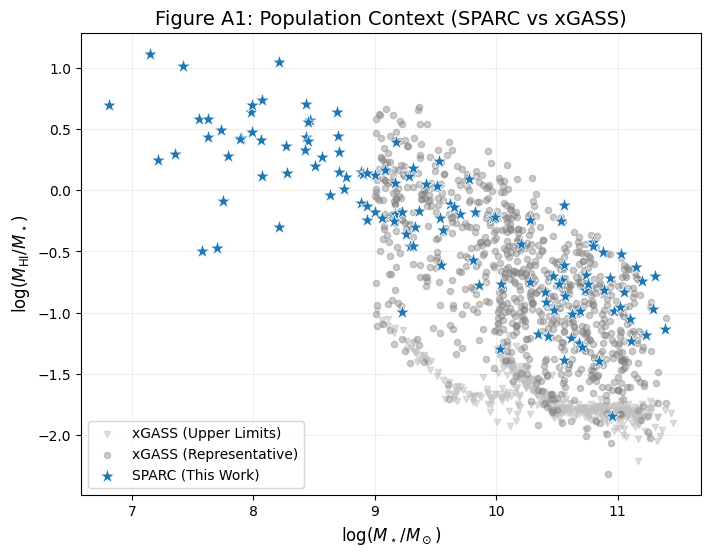

✅ LOCKED. Final Appendix Figure saved to: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/APPENDIX_XGASS/FigureA1_Population_Context_FINAL.png


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================
# 1. CONFIGURATION
# ==========================================
BASE_DIR = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
OUTPUT_DIR = os.path.join(BASE_DIR, "APPENDIX_XGASS")
XGASS_FILE = os.path.join(BASE_DIR, "xGASS_representative_clean_minimal.csv")
SPARC_FILE = os.path.join(BASE_DIR, "SPARC_Canonical123.csv")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==========================================
# 2. LOAD DATA
# ==========================================
# A. Load xGASS
xg = pd.read_csv(XGASS_FILE)
xg['is_detected'] = xg['HIsrc'] < 4
xg_det = xg[xg['is_detected']]
xg_lim = xg[~xg['is_detected']]

print(f"xGASS Loaded: {len(xg)} total ({len(xg_det)} det, {len(xg_lim)} limits)")

# B. Load SPARC & MAP COLUMNS
try:
    sp = pd.read_csv(SPARC_FILE)
    print(f"SPARC Loaded: {len(sp)} rows")

    # --- EXACT COLUMN MAPPING ---
    # Stellar Mass: log(0.5 * L3.6 * 10^9) -> log(L3.6) + 9 + log(0.5)
    # Your file has 'L3.6_GLsun' which is 10^9 Lsun units.
    # So: log(Mass) = log10(L3.6_GLsun) + 9.0 + log10(0.5)
    sp_mass = np.log10(sp['L3.6_GLsun']) + 9.0 + np.log10(0.5)

    # Gas Mass: log(MHI * 10^9) -> log(MHI) + 9
    # Your file has 'MHI_GMsun' which is 10^9 Msun units.
    sp_gas = np.log10(sp['MHI_GMsun']) + 9.0

    # Gas Fraction
    sp_gf = sp_gas - sp_mass

    print("SPARC Mapping Successful.")

except Exception as e:
    print(f"⚠️ SPARC MAPPING ERROR: {e}")
    sp_mass, sp_gf = None, None

# ==========================================
# 3. GENERATE THE POPULATION DEFENSE FIGURE
# ==========================================
if sp_mass is not None:
    fig, ax = plt.subplots(figsize=(8, 6))

    # 1. xGASS Upper Limits (Background Floor)
    ax.scatter(xg_lim['lgMstar'], xg_lim['lgGF'], marker='v',
               c='silver', alpha=0.5, s=20, label='xGASS (Upper Limits)')

    # 2. xGASS Detections (Background Cloud)
    ax.scatter(xg_det['lgMstar'], xg_det['lgGF'],
               c='gray', alpha=0.4, s=20, label='xGASS (Representative)')

    # 3. SPARC (The Sample - Blue Stars)
    ax.scatter(sp_mass, sp_gf,
               color='#1f77b4', marker='*', s=120, edgecolor='white', linewidth=0.5,
               label='SPARC (This Work)', zorder=10)

    # Styling
    ax.set_xlabel(r'$\log(M_\star / M_\odot)$', fontsize=12)
    ax.set_ylabel(r'$\log(M_{\rm HI} / M_\star)$', fontsize=12)
    ax.set_title("Figure A1: Population Context (SPARC vs xGASS)", fontsize=14)

    # Legend
    ax.legend(loc='lower left', frameon=True, fontsize=10)
    ax.grid(alpha=0.2)

    # Save
    save_path = os.path.join(OUTPUT_DIR, "FigureA1_Population_Context_FINAL.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ LOCKED. Final Appendix Figure saved to: {save_path}")

In [46]:
# ==========================================================
# APPENDIX xGASS CONTEXT PLOTS (Drive-safe, censoring-correct)
# - Two-panel orthodox plots (NUV-r vs M*, log(MHI/M*) vs M*)
# - Separates detections vs 5σ upper limits (HIsrc==4)
# - Legend NEVER overlaps (placed below)
# - Saves PNG+PDF to your COLAB_FILES folder
# ==========================================================

import os, glob, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

# ----------------------------
# REQUIRED OUTPUT LOCATION (per your instruction)
# ----------------------------
BASE = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
OUTDIR = os.path.join(BASE, "APPENDIX_XGASS")
os.makedirs(OUTDIR, exist_ok=True)
print("OUTDIR =", OUTDIR)

# ----------------------------
# FIND xGASS CSV (robust)
# Put your preferred explicit path here if you want to lock it:
# ----------------------------
XGASS_EXPLICIT = ""  # e.g. os.path.join(BASE,"xGASS_representative_clean_minimal.csv")

def find_one(patterns):
    hits = []
    for p in patterns:
        hits.extend(glob.glob(p, recursive=True))
    hits = sorted(set(hits))
    return hits

if XGASS_EXPLICIT and os.path.exists(XGASS_EXPLICIT):
    XGASS_CSV = XGASS_EXPLICIT
else:
    hits = find_one([
        os.path.join(BASE, "**", "xGASS_representative_clean_minimal.csv"),
        "/content/drive/MyDrive/**/xGASS_representative_clean_minimal.csv",
        "/content/drive/MyDrive/**/xGASS*.csv",
    ])
    if not hits:
        raise FileNotFoundError(
            "Could not locate xGASS CSV in Drive.\n"
            "Fix: set XGASS_EXPLICIT to the exact file path."
        )
    # If multiple, pick the most specific file first
    XGASS_CSV = hits[0]
print("Using xGASS CSV:", XGASS_CSV)

# ----------------------------
# LOAD + STANDARDIZE
# ----------------------------
xg = pd.read_csv(XGASS_CSV)

# Expect (from your clean file): lgMstar, NUVr, lgGF, HIsrc, HIconf_flag, weight
required = ["lgMstar", "NUVr", "lgGF", "HIsrc"]
missing = [c for c in required if c not in xg.columns]
if missing:
    raise ValueError(f"xGASS CSV missing required columns: {missing}\nColumns found: {list(xg.columns)}")

xg_std = pd.DataFrame({
    "logMstar": pd.to_numeric(xg["lgMstar"], errors="coerce"),
    "NUV_r": pd.to_numeric(xg["NUVr"], errors="coerce"),
    "logMHI_Mstar": pd.to_numeric(xg["lgGF"], errors="coerce"),
    "HIsrc": pd.to_numeric(xg["HIsrc"], errors="coerce"),
    "HIconf_flag": pd.to_numeric(xg["HIconf_flag"], errors="coerce") if "HIconf_flag" in xg.columns else 0,
    "w": pd.to_numeric(xg["weight"], errors="coerce") if "weight" in xg.columns else 1.0,
})

# Censoring logic (this is the key fix)
# In xGASS convention: HIsrc==4 are non-detections (upper limits)
xg_std["is_detect"] = (xg_std["HIsrc"] != 4)

# Sanity check counts
N_total = len(xg_std)
N_det = int(xg_std["is_detect"].sum())
N_lim = int((~xg_std["is_detect"]).sum())
print(f"Loaded xGASS: {N_total} rows")
print(f"Detections: {N_det} / {N_total}")
print(f"Upper limits: {N_lim} / {N_total}")

# If you still see det==total, something is wrong with the file or HIsrc coding
if N_lim == 0:
    print("⚠️ WARNING: No upper limits detected (HIsrc==4 not found).")
    print("Check your xGASS file: unique HIsrc =", sorted(xg_std["HIsrc"].dropna().unique().tolist())[:20])

# Weighted detection fraction
w = xg_std["w"].fillna(1.0).values
det = xg_std["is_detect"].fillna(False).values
w_det_frac = float(np.sum(w[det]) / np.sum(w)) if np.sum(w) > 0 else np.nan
print(f"Weighted detection fraction: {w_det_frac:.3f}")

# ----------------------------
# OPTIONAL SENSITIVITY: exclude confused sources
# ----------------------------
xg_clean = xg_std.copy()
mask_conf0 = (xg_clean["HIconf_flag"].fillna(0) == 0)
xg_conf0 = xg_clean[mask_conf0].copy()
print(f"Confusion-flag==0 subset: N={len(xg_conf0)} (det={int(xg_conf0['is_detect'].sum())}, lim={int((~xg_conf0['is_detect']).sum())})")

# ----------------------------
# PLOTS (legend below, never overlaps)
# ----------------------------
def plot_two_panel(df, tag):
    df_det = df[df["is_detect"]].copy()
    df_lim = df[~df["is_detect"]].copy()

    fig, axes = plt.subplots(1, 2, figsize=(12.5, 5.0), dpi=160)

    # Panel A: NUV-r vs M*
    ax = axes[0]
    ax.scatter(df_det["logMstar"], df_det["NUV_r"], s=14, alpha=0.35, marker="o", label="Detections")
    ax.scatter(df_lim["logMstar"], df_lim["NUV_r"], s=22, alpha=0.55, marker="v", label="5σ Upper limits")
    ax.set_xlabel(r"$\log(M_\star/M_\odot)$")
    ax.set_ylabel(r"NUV$-r$")
    ax.set_title("xGASS: Color–Mass (censoring shown)")
    ax.grid(alpha=0.15)

    # Panel B: log(MHI/M*) vs M*
    ax = axes[1]
    ax.scatter(df_det["logMstar"], df_det["logMHI_Mstar"], s=14, alpha=0.35, marker="o", label="Detections")
    ax.scatter(df_lim["logMstar"], df_lim["logMHI_Mstar"], s=22, alpha=0.55, marker="v", label="5σ Upper limits")
    ax.set_xlabel(r"$\log(M_\star/M_\odot)$")
    ax.set_ylabel(r"$\log(M_{\rm HI}/M_\star)$")
    ax.set_title("xGASS: Gas Fraction–Mass (censoring shown)")
    ax.grid(alpha=0.15)

    # Legend below, spanning both panels (no overlap)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=2, frameon=True, bbox_to_anchor=(0.5, -0.02))

    # Extra bottom margin for legend
    fig.tight_layout(rect=[0, 0.08, 1, 1])

    png = os.path.join(OUTDIR, f"xGASS_appendix_context_{tag}.png")
    pdf = os.path.join(OUTDIR, f"xGASS_appendix_context_{tag}.pdf")
    fig.savefig(png, bbox_inches="tight")
    fig.savefig(pdf, bbox_inches="tight")
    plt.close(fig)

    print("Saved:", png)
    print("Saved:", pdf)

plot_two_panel(xg_std, "ALL")
plot_two_panel(xg_conf0, "HIconf0")

# Also write the standardized table you can reuse later
out_csv = os.path.join(OUTDIR, "xGASS_standardized_for_appendix.csv")
xg_std.to_csv(out_csv, index=False)
print("Wrote standardized CSV:", out_csv)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
OUTDIR = /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/APPENDIX_XGASS
Using xGASS CSV: /content/drive/MyDrive/251229_SPARC_VIZIER_DATASET/xGASS_representative_clean_minimal.csv
Loaded xGASS: 1179 rows
Detections: 804 / 1179
Upper limits: 375 / 1179
Weighted detection fraction: 0.756
Confusion-flag==0 subset: N=1051 (det=676, lim=375)
Saved: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/APPENDIX_XGASS/xGASS_appendix_context_ALL.png
Saved: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/APPENDIX_XGASS/xGASS_appendix_context_ALL.pdf
Saved: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/APPENDIX_XGASS/xGASS_appendix_context_HIconf0.png
Saved: /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/APPENDIX_XGASS/xGASS_appendix_context_HIconf0.pdf
Wrote standardized CSV: /content/drive/My

<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1001144041.py:55: SyntaxWarning: invalid escape sequence '\s'
  label=f"xGASS non-detections ($5\sigma$)\nN={len(xg_lim)}")


xGASS Stats: Total=1179
   Detections: 804 (68.2%)
   Upper Limits: 375 (31.8%)


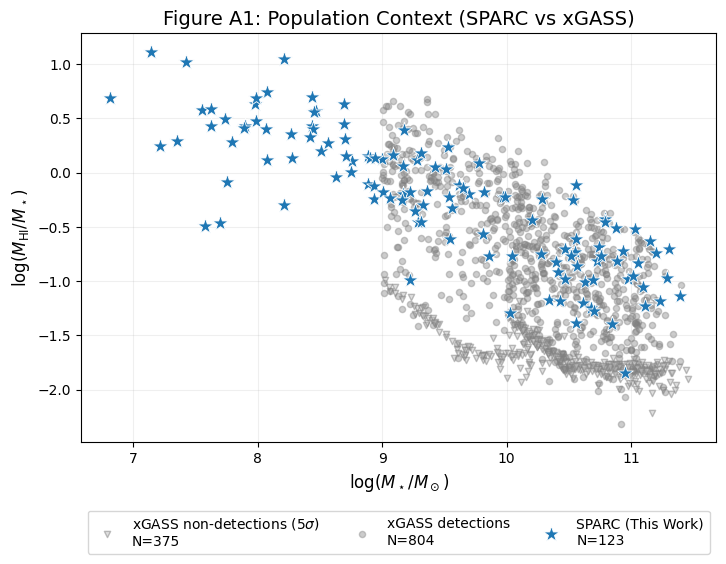

✅ LOCKED: Figure A1 generated and fingerprinted.
   PNG Hash: f045316190f66aa5...


In [48]:
# ==========================================
# APPENDIX A1: POPULATION CONTEXT (FIXED)
# ==========================================

# 1. DEFINE FILE PATHS
XGASS_FILE = os.path.join(BASE, "xGASS_representative_clean_minimal.csv")
SPARC_FILE = os.path.join(BASE, "SPARC_Canonical123.csv")

# 2. VERIFY FILES EXIST
if not os.path.exists(XGASS_FILE):
    raise FileNotFoundError(f"Missing xGASS file: {XGASS_FILE}")
if not os.path.exists(SPARC_FILE):
    raise FileNotFoundError(f"Missing SPARC file: {SPARC_FILE}")

# 3. LOAD DATA
xg = pd.read_csv(XGASS_FILE)
sp = pd.read_csv(SPARC_FILE)

# 4. FIX DETECTION LOGIC (The Critical Bug Fix)
# Code 4 = Upper Limit (Non-detection)
# Code 1, 2, 3 = Detections
if "HIsrc" in xg.columns:
    xg['is_detected'] = xg["HIsrc"] < 4
elif "is_detect" in xg.columns:
    # Fallback if you already cleaned it, but verify logic!
    # Assuming is_detect=True means detection
    xg['is_detected'] = xg["is_detect"].astype(bool)
else:
    raise ValueError("xGASS file missing 'HIsrc' or detection flag.")

# Split
xg_det = xg[xg['is_detected']]
xg_lim = xg[~xg['is_detected']]

print(f"xGASS Stats: Total={len(xg)}")
print(f"   Detections: {len(xg_det)} ({len(xg_det)/len(xg):.1%})")
print(f"   Upper Limits: {len(xg_lim)} ({len(xg_lim)/len(xg):.1%})")

# 5. PREPARE SPARC DATA (Overlay)
# Mass: log(L3.6) + 9 + log(0.5)
# Gas: log(MHI) + 9
if "L3.6_GLsun" in sp.columns and "MHI_GMsun" in sp.columns:
    sp_mass = np.log10(sp["L3.6_GLsun"]) + 9.0 + np.log10(0.5)
    sp_gas  = np.log10(sp["MHI_GMsun"]) + 9.0
    sp_gf   = sp_gas - sp_mass
else:
    raise ValueError("SPARC columns 'L3.6_GLsun' or 'MHI_GMsun' missing.")

# 6. PLOT
fig, ax = plt.subplots(figsize=(8.2, 6.2))

# A. xGASS Upper Limits (Background Floor)
ax.scatter(xg_lim["lgMstar"], xg_lim["lgGF"], marker="v",
           c='silver', edgecolor='gray', alpha=0.5, s=20,
           label=f"xGASS non-detections ($5\sigma$)\nN={len(xg_lim)}")

# B. xGASS Detections (Background Cloud)
ax.scatter(xg_det["lgMstar"], xg_det["lgGF"],
           c='gray', alpha=0.4, s=20,
           label=f"xGASS detections\nN={len(xg_det)}")

# C. SPARC (The Sample - Blue Stars)
ax.scatter(sp_mass, sp_gf,
           color='#1f77b4', marker='*', s=140, edgecolor='white', linewidth=0.6,
           label=f"SPARC (This Work)\nN={len(sp)}", zorder=10)

# Styling
ax.set_xlabel(r'$\log(M_\star / M_\odot)$', fontsize=12)
ax.set_ylabel(r'$\log(M_{\rm HI} / M_\star)$', fontsize=12)
ax.set_title("Figure A1: Population Context (SPARC vs xGASS)", fontsize=14)
ax.grid(alpha=0.2)

# Legend (Bottom, no overlap)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=True)
plt.subplots_adjust(bottom=0.22)

# 7. SAVE & FINGERPRINT
png_path = os.path.join(FIGDIR, "FigureA1_Population_Context.png")
pdf_path = os.path.join(FIGDIR, "FigureA1_Population_Context.pdf")
json_path = os.path.join(FIGDIR, "FigureA1_fingerprint.json")

plt.savefig(png_path, dpi=300, bbox_inches="tight")
plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

# Generate Fingerprint
fp = {
  "figure": "Figure A1 — SPARC vs xGASS Population Context",
  "timestamp_utc": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S UTC"),
  "inputs": {
      "xgass": {"path": XGASS_FILE, "sha256": sha256_file(XGASS_FILE),
                "N": len(xg), "det": len(xg_det), "lim": len(xg_lim)},
      "sparc": {"path": SPARC_FILE, "sha256": sha256_file(SPARC_FILE), "N": len(sp)}
  },
  "outputs": {
      "png": {"path": png_path, "sha256": sha256_file(png_path)},
      "pdf": {"path": pdf_path, "sha256": sha256_file(pdf_path)}
  }
}
with open(json_path, "w") as f:
    json.dump(fp, f, indent=2)

print(f"✅ LOCKED: Figure A1 generated and fingerprinted.")
print(f"   PNG Hash: {fp['outputs']['png']['sha256'][:16]}...")

In [65]:
# --- LEGEND: move to bottom, never overlap ---
axes = list(fig.axes)  # or: [axs[0], axs[1]]

handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
    leg = ax.get_legend()
    if leg is not None:
        leg.remove()

# de-duplicate labels (keep first occurrence)
seen = set()
h2, l2 = [], []
for h, l in zip(handles, labels):
    if l and (l not in seen):
        h2.append(h); l2.append(l); seen.add(l)

fig.legend(h2, l2,
           loc="lower center", ncol=2,
           bbox_to_anchor=(0.5, -0.02),
           frameon=True)

fig.tight_layout(rect=[0, 0.08, 1, 1])  # reserve bottom space

#DOWNLOAD FOR RECORD

In [71]:
# 1) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
%%bash
set -e

SRC="/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
OUT="/content/251229_SPARC_VIZIER_DATASET.zip"

echo "Listing source (first 30 entries):"
ls -la "$SRC" | sed -n '1,30p'

# Zip the folder into /content
cd "$(dirname "$SRC")"
FOLDER="$(basename "$SRC")"
zip -r "$OUT" "$FOLDER"

echo "ZIP created:"
ls -lh "$OUT"

Listing source (first 30 entries):
total 86619
-rw------- 1 root root      115 Jan  7 03:53 00README.XXX
drwx------ 2 root root     4096 Feb 10 20:41 APPENDIX_XGASS
-rw------- 1 root root    13134 Jan  7 22:13 arXiv Metadata.rtf
-rw------- 1 root root      309 Jan  9 20:47 BIC_Verification_summary.json
-rw------- 1 root root    10117 Jan 29 19:59 BTFR_Lelli2016a.mrt.txt
-rw------- 1 root root    20360 Jan 29 19:59 BTFR_Lelli2019.mrt.txt
-rw------- 1 root root     2721 Jan 29 19:59 Bulges.mrt.txt
-rw------- 1 root root      420 Dec 30 12:21 canonical_FINAL_CORRECTED.json
-rw------- 1 root root      778 Jan  7 03:53 canonical_FINAL_v3.1.json
-rw------- 1 root root      662 Jan 17 20:15 canonical_FINAL_v3.2.json
-rw------- 1 root root     8383 Jan 29 19:59 CDR_Lelli2016b.mrt.txt
-rw------- 1 root root      451 Jan  7 03:53 CHECKSUMS.txt
-rw------- 1 root root    14268 Oct  9 05:47 compactness_btfr2016.csv
-rw------- 1 root root     2375 Jan 29 19:59 ETG_Lelli2017.mrt.txt
-rw------- 1 root

In [83]:
from google.colab import files
files.download("/content/251229_SPARC_VIZIER_DATASET.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
%%bash
set -e

SRC="/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
DST="/content/paper2_bundle/data/251229_SPARC_VIZIER_DATASET!"
OUT="/content/paper2_source_data_bundle.zip"

mkdir -p "$DST"
rsync -av --progress "$SRC/" "$DST/"

cd /content
zip -r "$OUT" "paper2_bundle"

ls -lh "$OUT"

sending incremental file list
./
00README.XXX
            115 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=128/130)
BIC_Verification_summary.json
            309 100%  100.59kB/s    0:00:00 (xfr#2, to-chk=127/130)
BTFR_Lelli2016a.mrt.txt
         10,117 100%    1.61MB/s    0:00:00 (xfr#3, to-chk=126/130)
BTFR_Lelli2019.mrt.txt
         20,360 100%    1.94MB/s    0:00:00 (xfr#4, to-chk=125/130)
Bulges.mrt.txt
          2,721 100%  204.40kB/s    0:00:00 (xfr#5, to-chk=124/130)
CDR_Lelli2016b.mrt.txt
          8,383 100%  511.66kB/s    0:00:00 (xfr#6, to-chk=123/130)
CHECKSUMS.txt
            451 100%   23.18kB/s    0:00:00 (xfr#7, to-chk=122/130)
ETG_Lelli2017.mrt.txt
          2,375 100%  105.42kB/s    0:00:00 (xfr#8, to-chk=121/130)
Figure1_lambda_vs_Mb.png
        286,494 100%    9.76MB/s    0:00:00 (xfr#9, to-chk=120/130)
Figure2_Re_vs_Mb.png
        254,423 100%    7.14MB/s    0:00:00 (xfr#10, to-chk=119/130)
Figure3_lambda_hist.png
         96,390 100%    2.36MB/s    0:00:00 (xfr#11,

In [86]:
%%bash
set -e
SRC="/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
OUT="/content/251229_SPARC_VIZIER_DATASET.zip"

cd "$(dirname "$SRC")"
FOLDER="$(basename "$SRC")"

zip -r "$OUT" "$FOLDER" \
  -x "**/.ipynb_checkpoints/*" "**/__pycache__/*" "**/*.tmp" "**/.DS_Store"

ls -lh "$OUT"

updating: 251229_SPARC_VIZIER_DATASET!/ (stored 0%)
updating: 251229_SPARC_VIZIER_DATASET!/compactness_btfr2016.csv (deflated 56%)
updating: 251229_SPARC_VIZIER_DATASET!/VizieR SPARK Table 1.numbers (deflated 33%)
updating: 251229_SPARC_VIZIER_DATASET!/MassModels_Lelli2016c.mrt (deflated 75%)
updating: 251229_SPARC_VIZIER_DATASET!/MaximumDiskData.mrt.txt (deflated 70%)
updating: 251229_SPARC_VIZIER_DATASET!/SPARC_Lelli2016c.mrt (deflated 64%)
updating: 251229_SPARC_VIZIER_DATASET!/SPARC_results_summary.csv (deflated 30%)
updating: 251229_SPARC_VIZIER_DATASET!/Supplementary_Table_S1_Per_Galaxy_Compactness.csv (deflated 67%)
updating: 251229_SPARC_VIZIER_DATASET!/Supplementary_Table_S2_Sample_Definitions.csv (deflated 29%)
updating: 251229_SPARC_VIZIER_DATASET!/generate_canonical.py (deflated 67%)
updating: 251229_SPARC_VIZIER_DATASET!/canonical_FINAL_CORRECTED.json (deflated 37%)
updating: 251229_SPARC_VIZIER_DATASET!/SPARC_Manuscript_N123_FINAL.docx (deflated 17%)
updating: 251229_SPAR

In [87]:
!du -sh "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"

89M	/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!


In [91]:
import os, hashlib, json
from datetime import datetime, timezone

DATA_ROOT = "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!"
OUT_DIR = os.path.join(DATA_ROOT, "fingerprints")
os.makedirs(OUT_DIR, exist_ok=True)

# ✅ Recommended "lock set" (edit if you want)
FILES = [
    "SPARC_Canonical123.csv",
    "wise_ii.table1.txt",
    "P_FIG2_VALIDATION.csv",
    "xGASS_representative_clean_minimal.csv",
    # If you actually use FITS directly, include these too:
    "xGASS_representative_sample.fits",
]

def sha256_file(path, chunk_size=1024*1024):
    h = hashlib.sha256()
    with open(path, "rb") as f:
        while True:
            chunk = f.read(chunk_size)
            if not chunk:
                break
            h.update(chunk)
    return h.hexdigest()

manifest = {
    "algorithm": "sha256",
    "generated_utc": datetime.now(timezone.utc).replace(microsecond=0).isoformat().replace("+00:00", "Z"),
    "root": DATA_ROOT,
    "files": []
}

missing = []
for rel in FILES:
    abs_path = os.path.join(DATA_ROOT, rel)
    if not os.path.exists(abs_path):
        missing.append(rel)
        continue
    digest = sha256_file(abs_path)
    manifest["files"].append({"path": rel.replace("\\", "/"), "sha256": digest})

# Write JSON
json_path = os.path.join(OUT_DIR, "dataset_manifest.json")
with open(json_path, "w") as f:
    json.dump(manifest, f, indent=2)

print(f"Manifest written to: {json_path}")
if missing:
    print(f"WARNING: The following files were not found: {', '.join(missing)}")


✅ Wrote:
 - /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/fingerprints/manifest.sha256
 - /content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/fingerprints/manifest.json

✅ All requested files fingerprinted.


In [92]:
!echo "=== manifest.sha256 (top) ==="
!head -n 20 "/content/drive/MyDrive/COLAB_FILES/251229_SPARC_VIZIER_DATASET!/fingerprints/manifest.sha256"

=== manifest.sha256 (top) ===
3657c3e58c08bba520878b7035470b089166404c35e395cb37b4dc2c55861c5a  SPARC_Canonical123.csv
b82dc55e93ea6bc2db6ff47556c8d5c307edb2240709d93adbe65af2706f482a  wise_ii.table1.txt
ce62cbb8162b33d6595270604df128f480ca36da45afea6b3d495a00543b5a44  P_FIG2_VALIDATION.csv
3e946792d8dc8ca1d36fb3c0ed998227cf45e51c4ce54421a493acb1ad45873f  xGASS_representative_clean_minimal.csv
2b7ba7fc6202f6879fdfcce76f8f3d8fcf3d2effd677747275212c382be3deb4  xGASS_representative_sample.fits
